# pile range 
234 - 236

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
import pywt

In [2]:
N_group = 81
T = 10
T1 = 0
T2 = 3
Left_edge = 234
Right_edge = 236

In [3]:
def data_load(path,N_group):
    f = open(path)
    lines = f.read()
    f.close()
    N_group = N_group
    lines1 = lines.split("\n",(1000*T+1)*N_group-1)
    data_list =[]
    for element in lines1:
        temp = element.split(' ',1)
        temp0 = temp[1]
        temp1 = temp0.strip()
        data_list.append(float(temp1))
    data = np.array(data_list)
    return data

In [4]:
def wgn(x, snr):
    Ps = np.sum(abs(x)**2)/len(x)
    Pn = Ps/(10**((snr/10)))
    noise = np.random.randn(len(x)) * np.sqrt(Pn)
    signal_add_noise = x + noise
    return signal_add_noise

In [5]:
# 小波滤噪
def wavelet_denoising(data):
    # 小波函数取db4
    db4 = pywt.Wavelet('sym2')
    coeffs = pywt.wavedec(data, db4)
        # 高频系数置零
    coeffs[len(coeffs)-1] *= 0
    coeffs[len(coeffs)-2] *= 0
        # 重构
    meta = pywt.waverec(coeffs, db4)
    return meta

In [6]:
import scipy
from scipy import signal

order = 5
sampling_freq = 100
cutoff_freq = 3
sampling_duration = 5
number_of_samples = sampling_freq * sampling_duration
normalized_cutoff_freq = 2 * cutoff_freq / sampling_freq
numerator_coeffs, denominator_coeffs = scipy.signal.butter(order, normalized_cutoff_freq)

# Without a pile

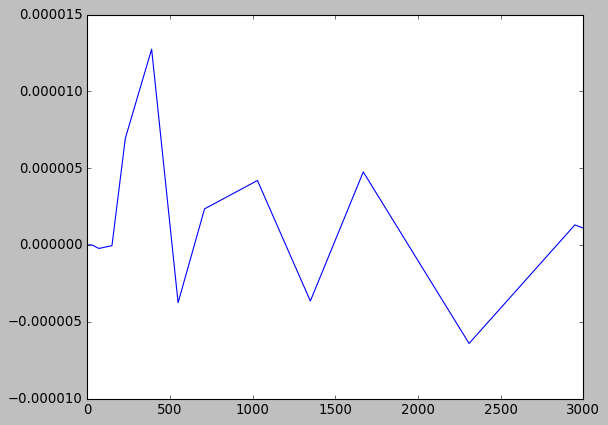

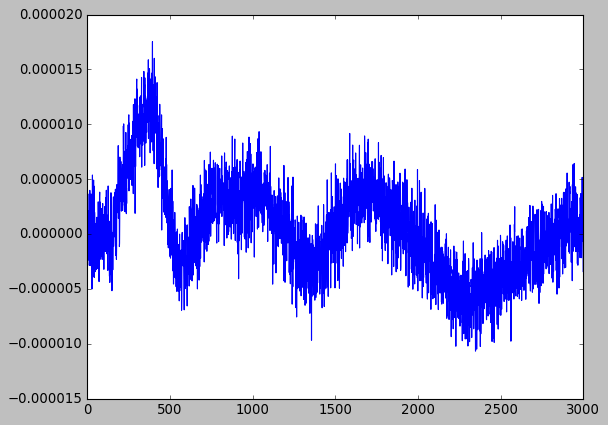

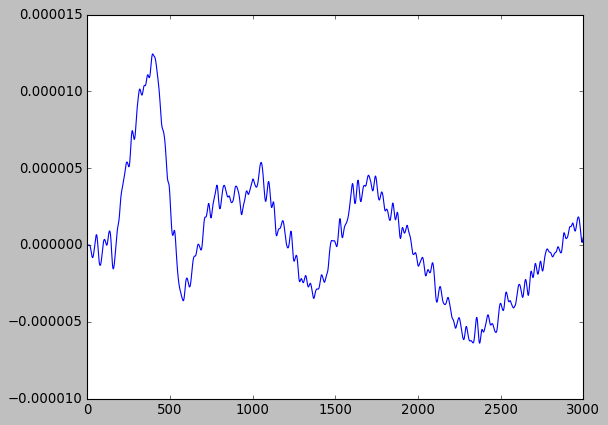

In [7]:
snr = 5
N_wv = 0

# 'v_disp_210_230_total41_without_a_plie.txt'
v_disp_210_230_total41_without_a_plie1 = data_load('v_disp_result_without_pile_210_230.txt',N_group)
v_disp_210_230_total41_without_a_plie2 = v_disp_210_230_total41_without_a_plie1.reshape(N_group,1000*T+1)
# 1200*41
v_disp_210_230_total41_without_a_plie3 = np.transpose(v_disp_210_230_total41_without_a_plie2)
# delete time 0
v_disp_210_230_total41_without_a_plie = v_disp_210_230_total41_without_a_plie3[int(1000*T1+1):int(1000*T2+1),:]
# test
plt.plot(v_disp_210_230_total41_without_a_plie[:,1])
plt.show()

for i in range(0,v_disp_210_230_total41_without_a_plie.shape[1]):
    v_disp_210_230_total41_without_a_plie[:,i] = wgn(v_disp_210_230_total41_without_a_plie[:,i],snr)
plt.plot(v_disp_210_230_total41_without_a_plie[:,1]) 
plt.show()

# v_disp_210_230_total41_without_a_plie

for i in range(0,v_disp_210_230_total41_without_a_plie.shape[1]):
    y = v_disp_210_230_total41_without_a_plie[:,i]
    for i in range(0,N_wv):
        y = wavelet_denoising(y)
    y = scipy.signal.lfilter(numerator_coeffs, denominator_coeffs, y)
    v_disp_210_230_total41_without_a_plie[:,i] = y
plt.plot(v_disp_210_230_total41_without_a_plie[:,1])
plt.show()

# with_a_plie

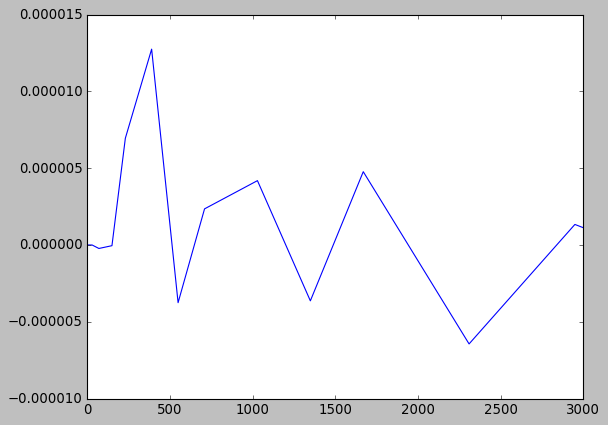

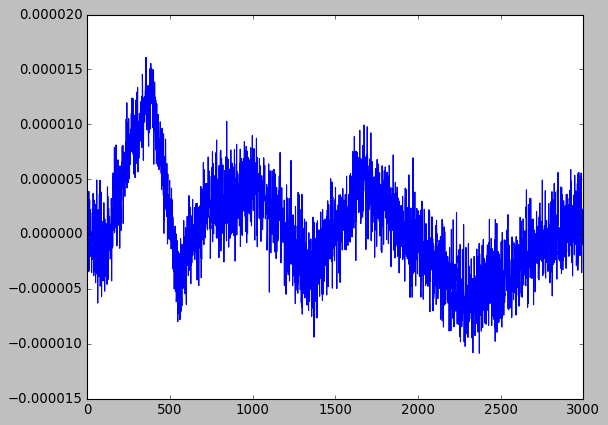

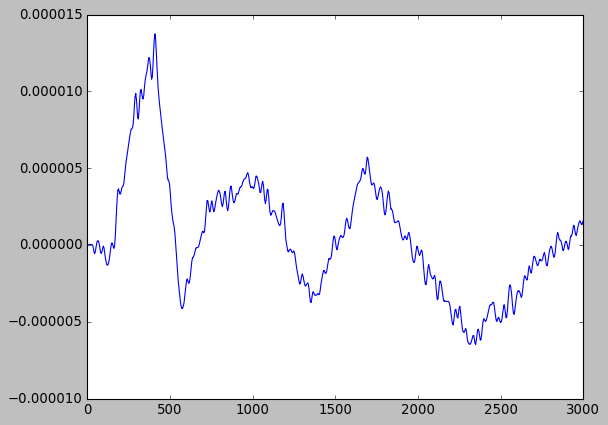

In [8]:
# 'v_disp_210_230_total41_with_a_plie.txt'
v_disp_210_230_total41_with_a_plie1 = data_load('v_disp_result_with_pile_210_230.txt',N_group)
v_disp_210_230_total41_with_a_plie2 = v_disp_210_230_total41_with_a_plie1.reshape(N_group,1000*T+1)
# 1200*41
v_disp_210_230_total41_with_a_plie3 = np.transpose(v_disp_210_230_total41_with_a_plie2)
# delete time 0
v_disp_210_230_total41_with_a_plie = v_disp_210_230_total41_with_a_plie3[int(1000*T1+1):int(1000*T2+1),:]
# test
plt.plot(v_disp_210_230_total41_with_a_plie[:,1])
plt.show()


for i in range(0,v_disp_210_230_total41_with_a_plie.shape[1]):
    v_disp_210_230_total41_with_a_plie[:,i] = wgn(v_disp_210_230_total41_with_a_plie[:,i],snr)
plt.plot(v_disp_210_230_total41_with_a_plie[:,1])   
plt.show()

# v_disp_210_230_total41_without_a_plie_f =np.array([,4]) 
for i in range(0,v_disp_210_230_total41_with_a_plie.shape[1]):
    y = v_disp_210_230_total41_with_a_plie[:,i]
    for i in range(0,N_wv):
        y = wavelet_denoising(y)
    y = scipy.signal.lfilter(numerator_coeffs, denominator_coeffs, y)
    y = wavelet_denoising(y)
    v_disp_210_230_total41_with_a_plie[:,i] = y
plt.plot(v_disp_210_230_total41_with_a_plie[:,1])
plt.show()

# V data difference

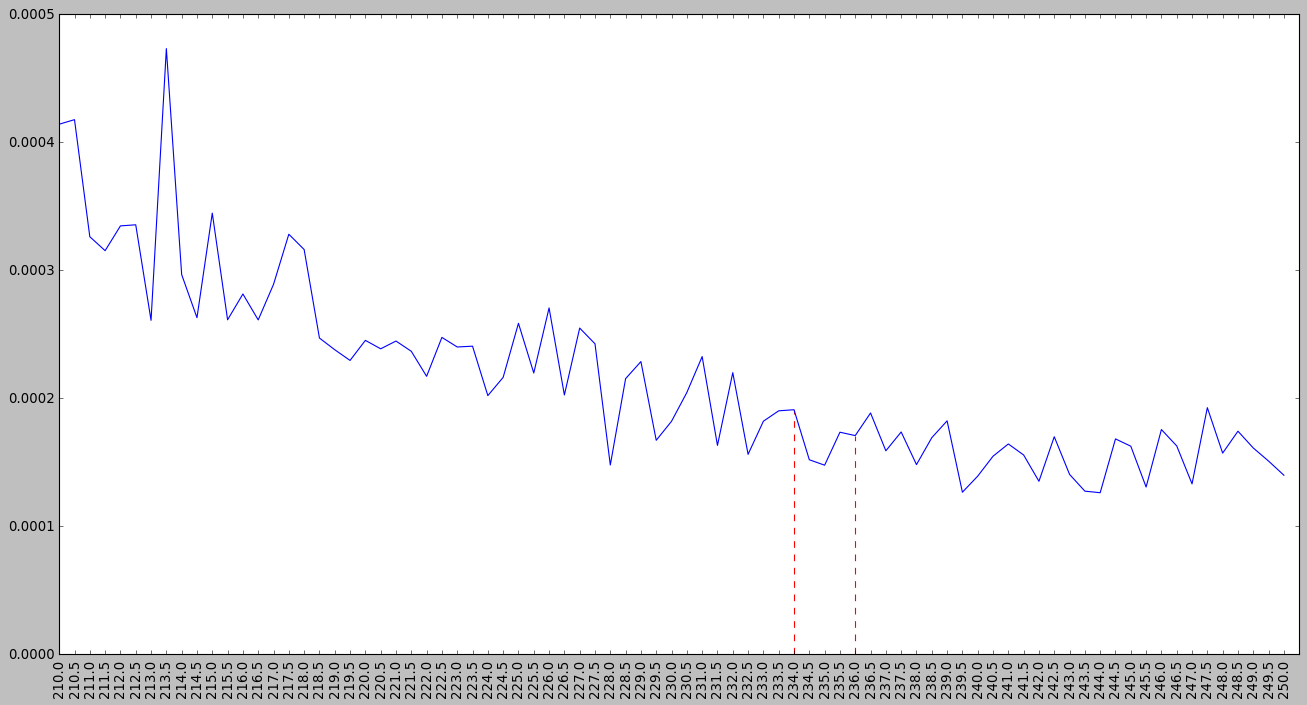

In [22]:
M = []
for i in range(v_disp_210_230_total41_without_a_plie.shape[1]):
#     plt.title(str(i*0.5+210))
    f1 = np.fft.rfft(v_disp_210_230_total41_with_a_plie[:,i])
    f0 = np.fft.rfft(v_disp_210_230_total41_without_a_plie[:,i])
    length = len(f1)
    AA = abs((f1[0:50]-f0[0:50]))
    M.append(AA.max())
    
plt.figure(figsize=(20, 10))
M = M
plt.plot(M)
plt.vlines((Left_edge-210)/0.5, 0, (M)[int((Left_edge-210)/0.5)],colors = "r", linestyles = "dashed")
plt.vlines((Right_edge-210)/0.5, 0,(M)[int((Right_edge-210)/0.5)],colors = "r", linestyles = "dashed")
x = np.linspace(0, N_group, num=N_group+1)
label = []
for i in range(0,N_group):
    label.append(str(i*0.5+210))
plt.xticks(x,label,rotation='vertical')
plt.show()

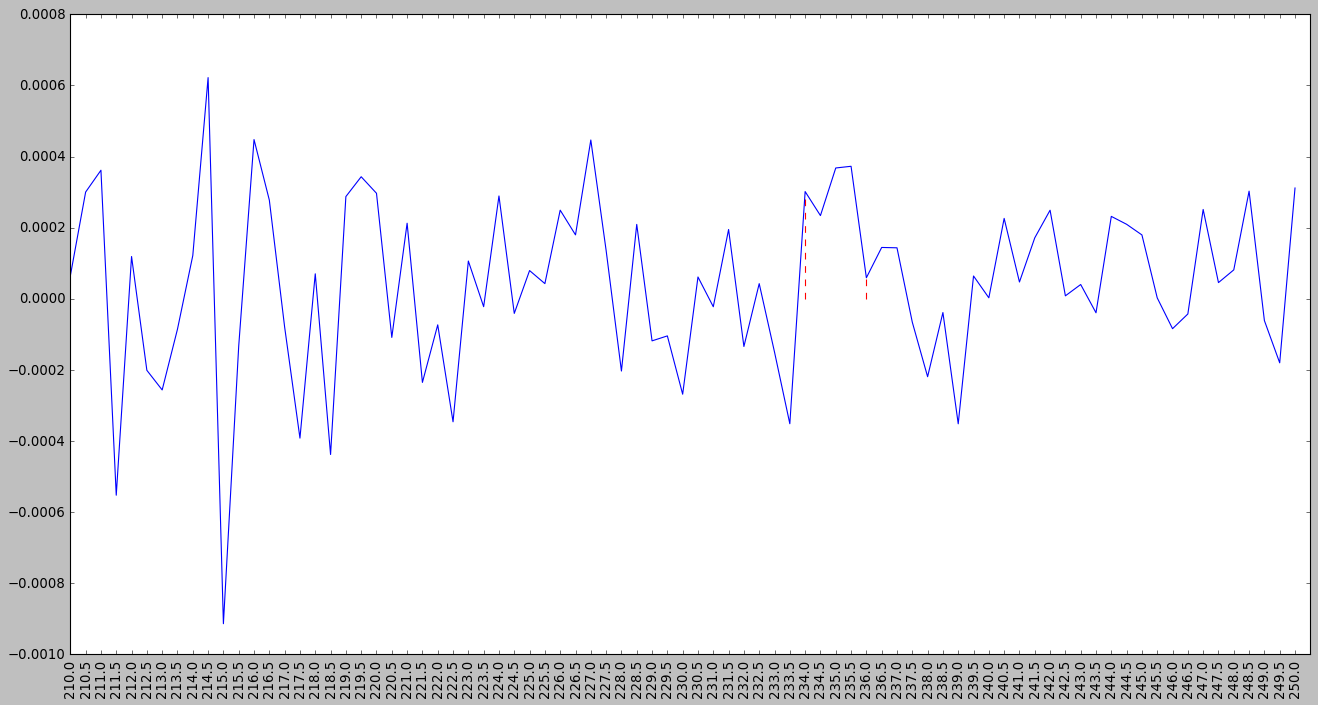

In [24]:
M1 = []
M0 = []
L = 10
X = np.linspace(0, L-1, L)
for i in range(v_disp_210_230_total41_without_a_plie.shape[1]):
#     plt.title(str(i*0.5+210))

    f1 = np.fft.rfft(v_disp_210_230_total41_with_a_plie[:,i])
    f0 = np.fft.rfft(v_disp_210_230_total41_without_a_plie[:,i])
    f1 = np.abs(f1[0:L])
    f0 = np.abs(f0[0:L])
    M0.append(np.sum(f0))
    M1.append(np.sum(f1))
    
plt.figure(figsize=(20, 10))
I0 = np.abs(np.array(M0))
I1 = np.abs(np.array(M1))
I = I1-I0
# plt.plot(I)
aa = I
plt.plot(aa)
plt.vlines((Left_edge-210)/0.5, 0, np.abs(aa)[int((Left_edge-210)/0.5)],colors = "r", linestyles = "dashed")
plt.vlines((Right_edge-210)/0.5, 0,np.abs(aa)[int((Right_edge-210)/0.5)],colors = "r", linestyles = "dashed")
x = np.linspace(0, N_group, num=N_group+1)
label = []
for i in range(0,N_group):
    label.append(str(i*0.5+210))
plt.xticks(x,label,rotation='vertical')
plt.show()

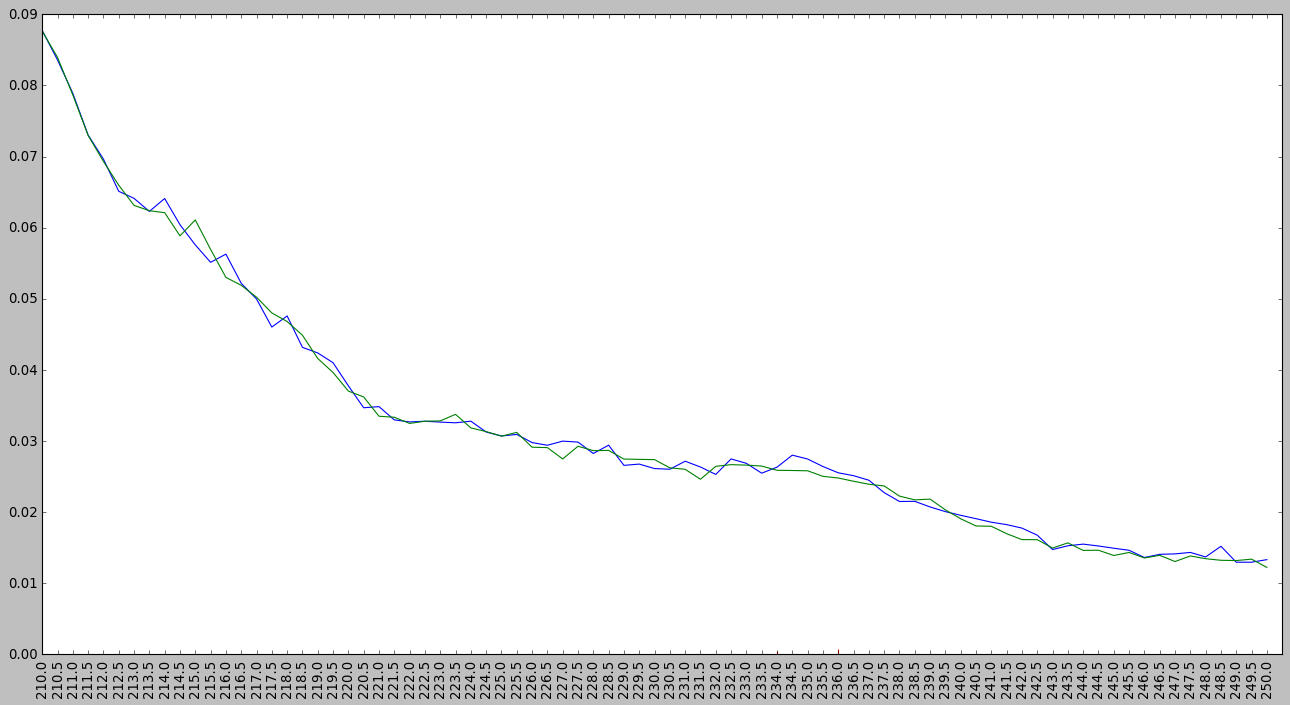

In [21]:
M1 = []
M0 = []
L=10
X = np.linspace(0, L-1, L)
for i in range(v_disp_210_230_total41_without_a_plie.shape[1]):
#     plt.title(str(i*0.5+210))

    f1 = np.fft.rfft(v_disp_210_230_total41_with_a_plie[:,i])
    f0 = np.fft.rfft(v_disp_210_230_total41_without_a_plie[:,i])
    f1 = np.abs(f1[0:L])*X
    f0 = np.abs(f0[0:L])*X
    M0.append(np.sum(f0))
    M1.append(np.sum(f1))
    

plt.figure(figsize=(20, 10))
I0 = np.abs(np.array(M0))
I1 = np.abs(np.array(M1))
I = I1-I0
# plt.plot(I)
# aa = I
plt.plot(I1)
plt.plot(I0)
plt.vlines((Left_edge-210)/0.5, 0, np.abs(aa)[int((Left_edge-210)/0.5)],colors = "r", linestyles = "dashed")
plt.vlines((Right_edge-210)/0.5, 0,np.abs(aa)[int((Right_edge-210)/0.5)],colors = "r", linestyles = "dashed")
x = np.linspace(0, N_group, num=N_group+1)
label = []
for i in range(0,N_group):
    label.append(str(i*0.5+210))
plt.xticks(x,label,rotation='vertical')
plt.show()

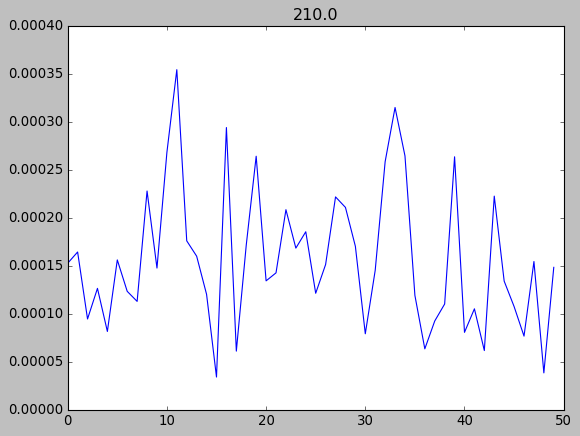

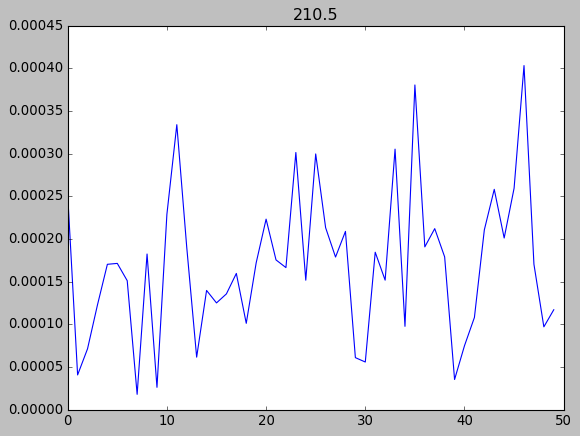

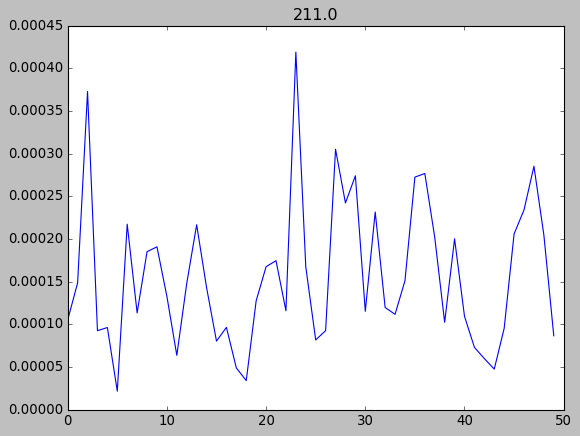

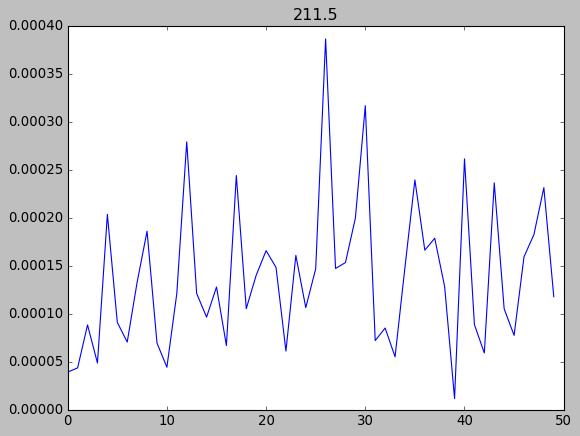

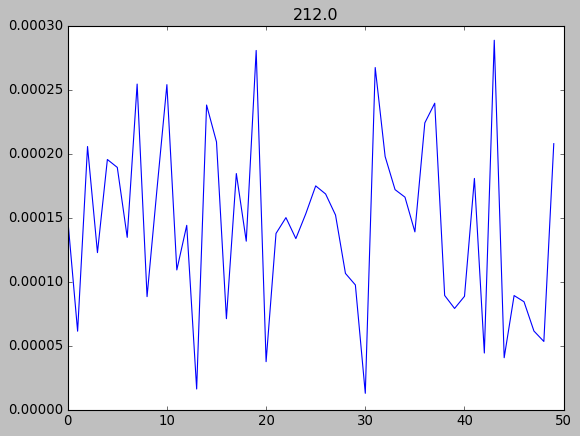

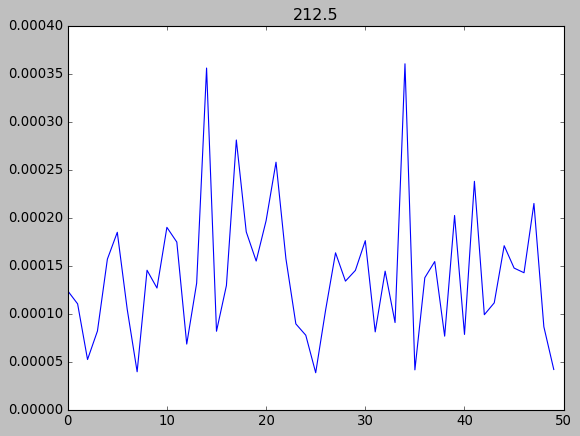

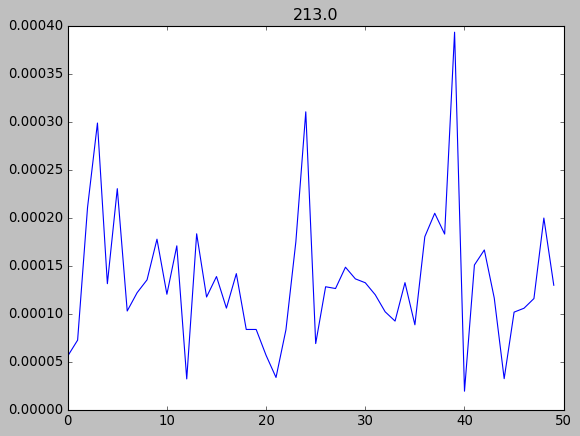

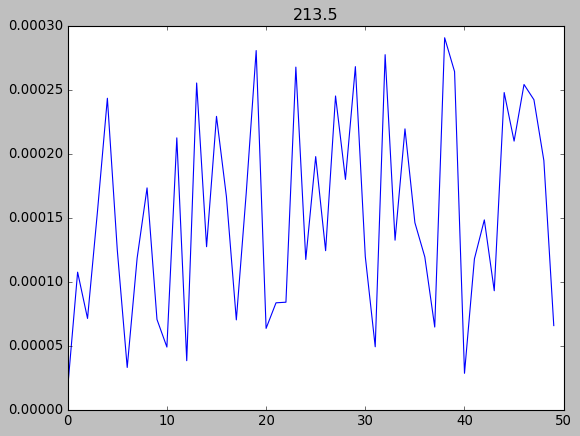

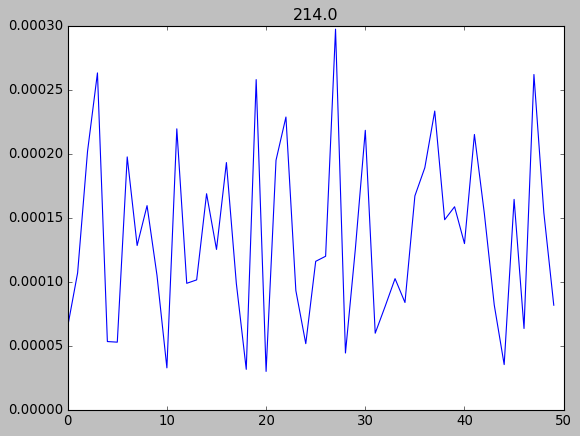

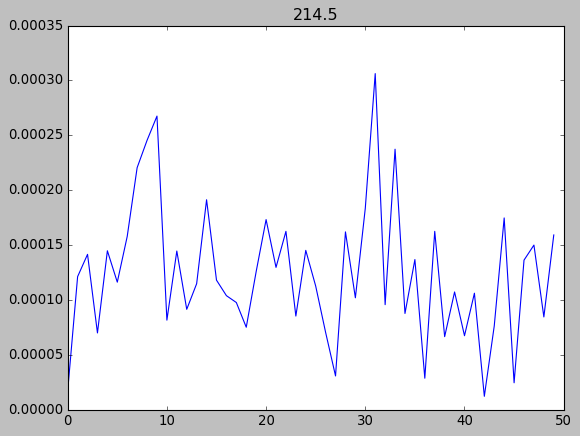

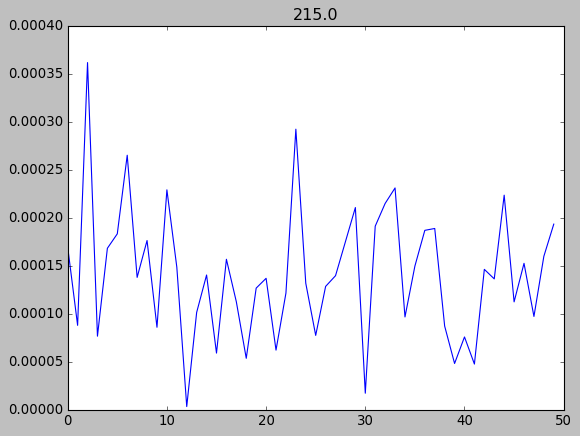

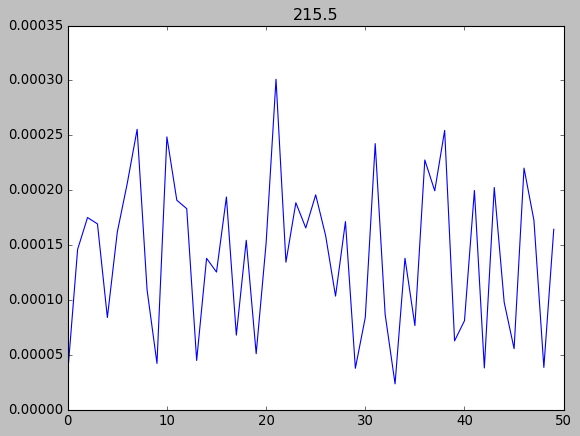

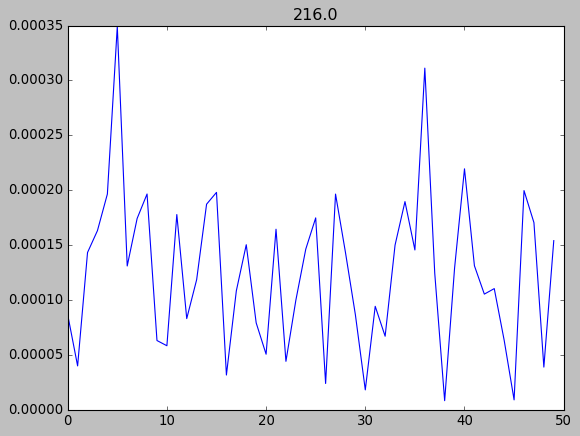

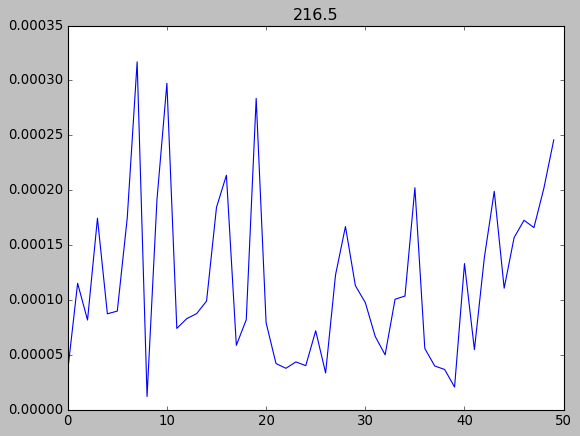

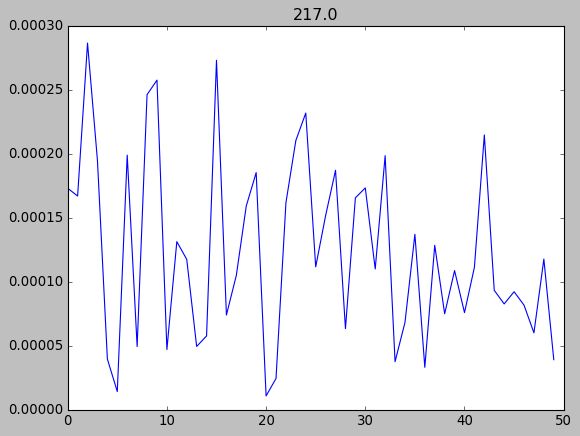

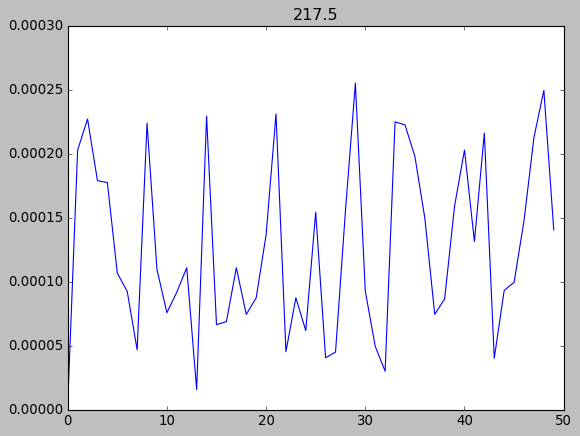

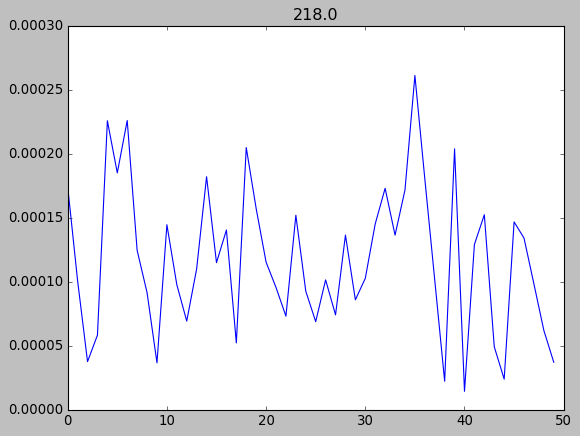

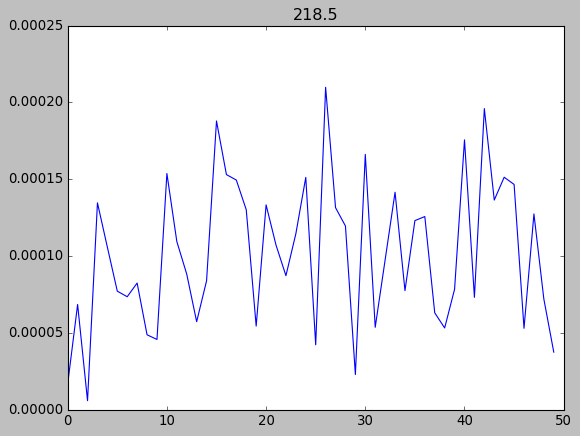

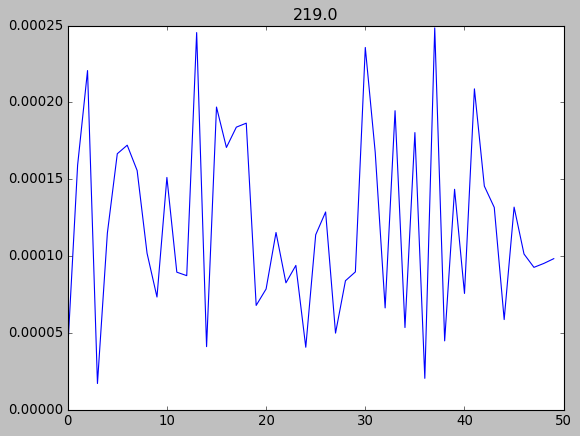

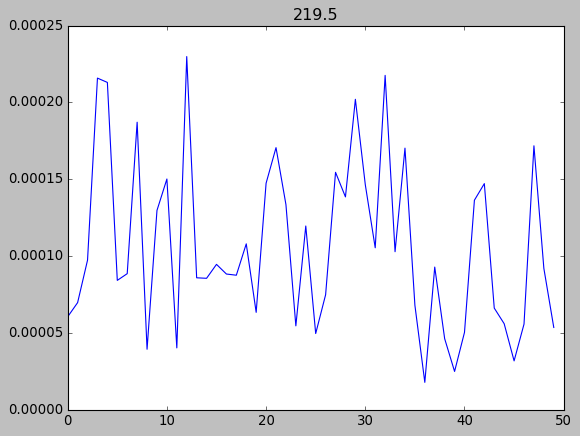

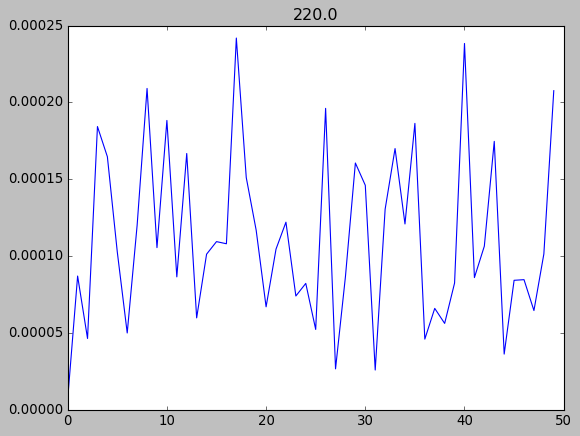

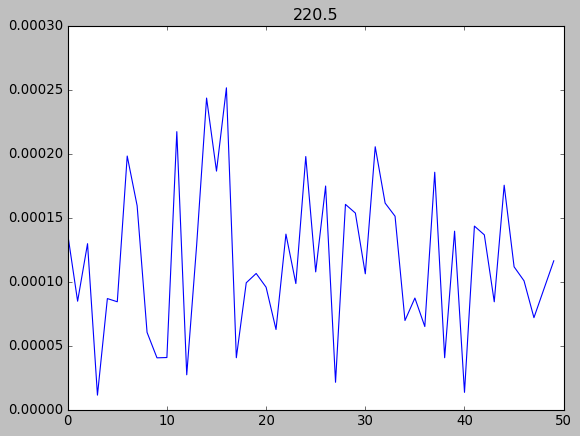

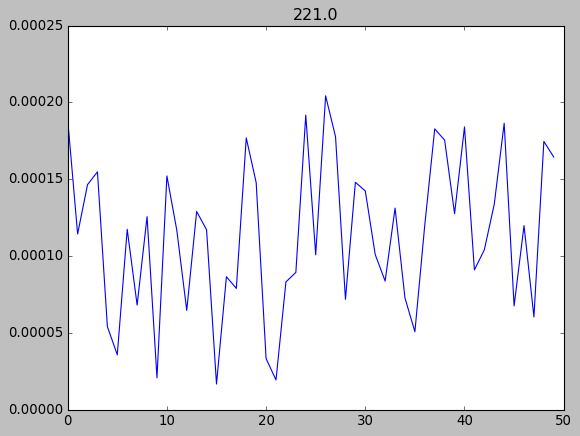

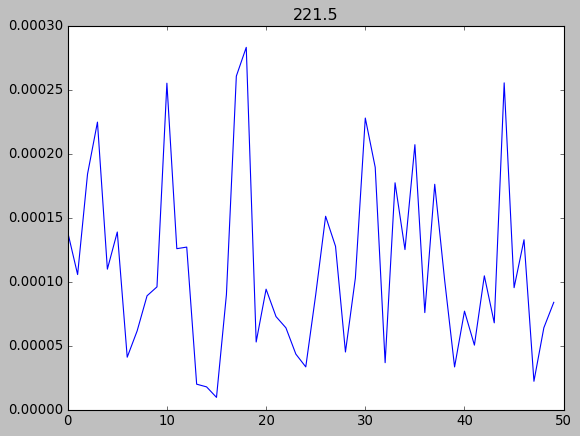

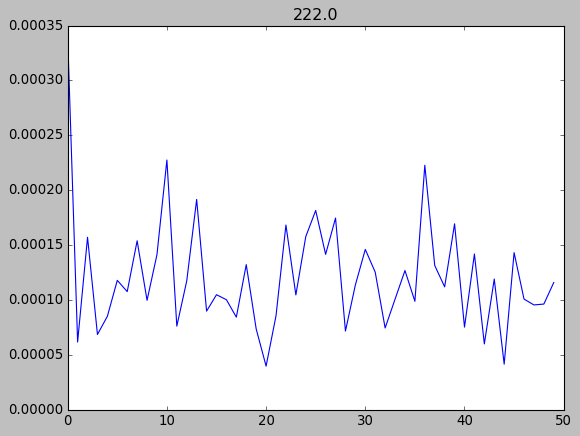

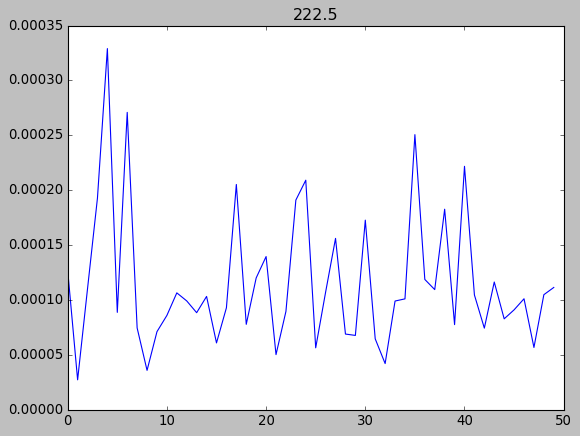

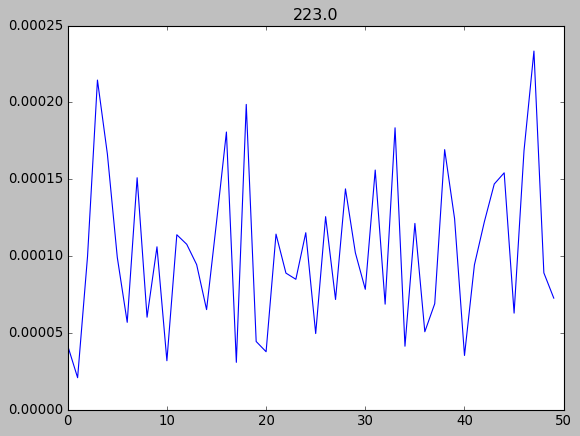

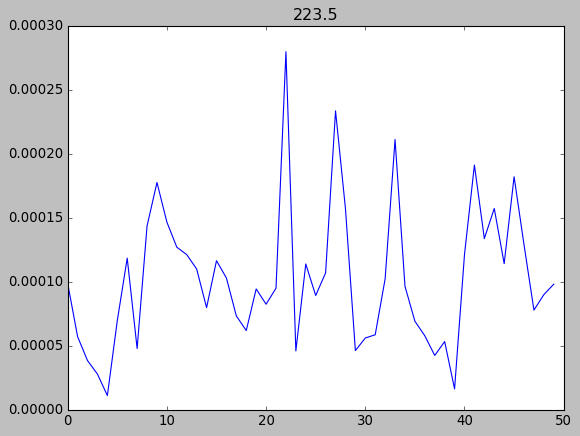

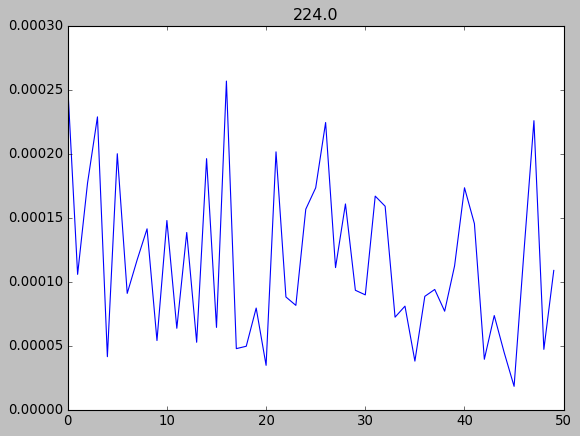

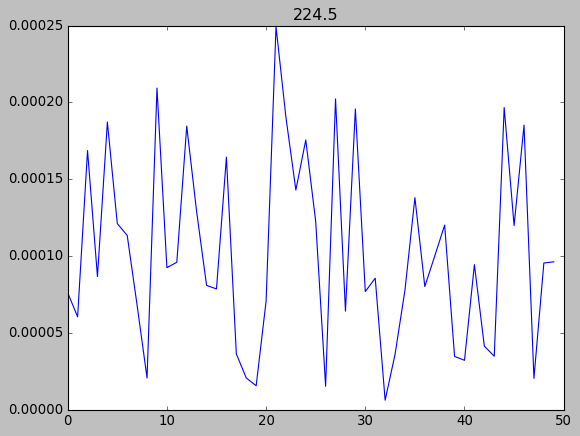

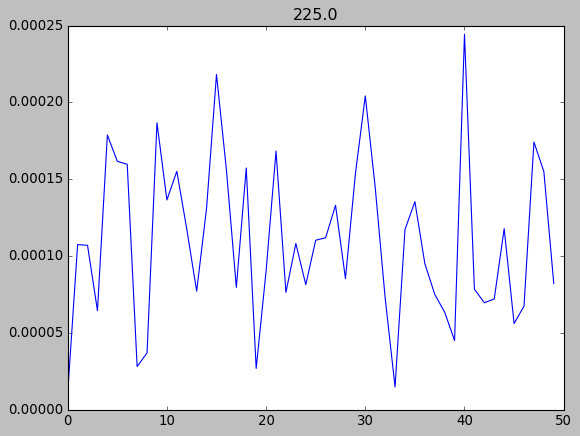

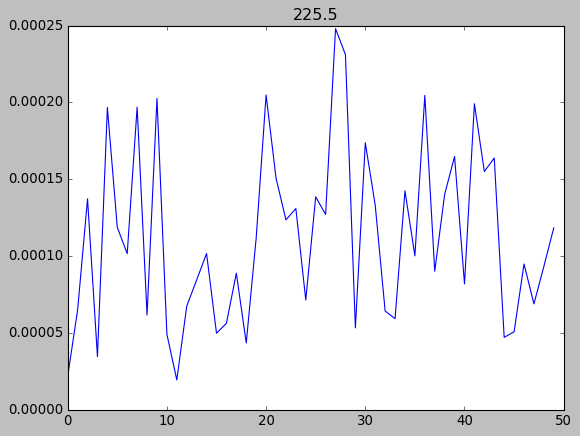

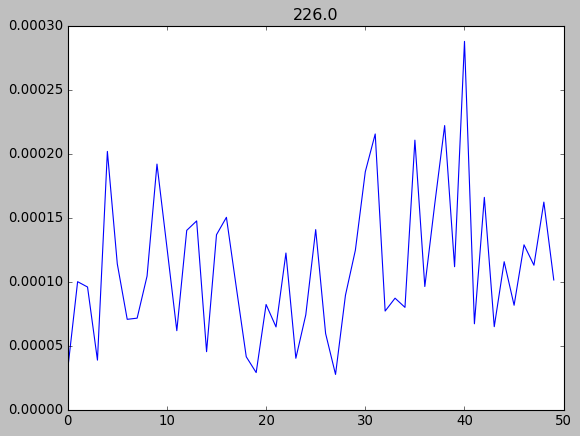

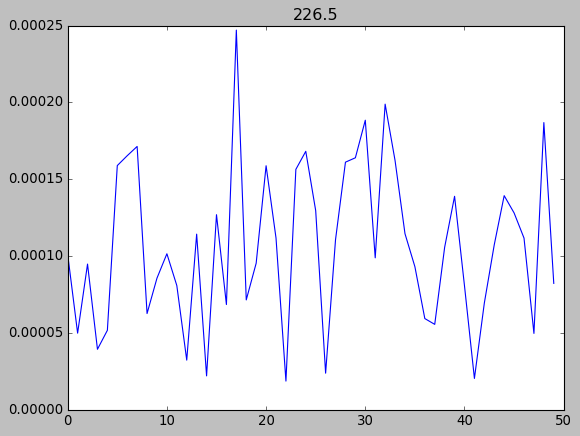

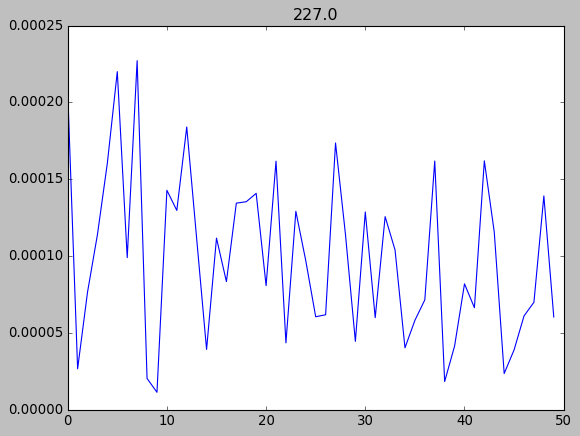

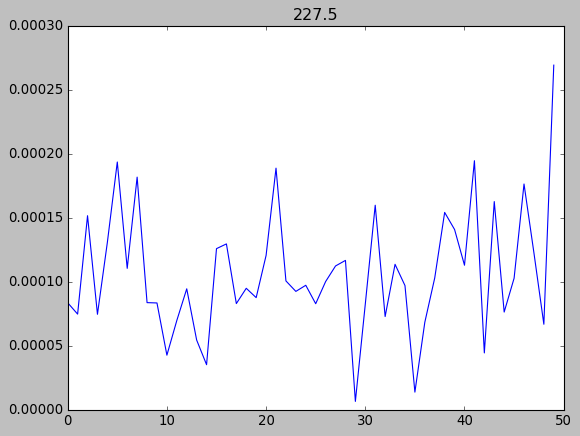

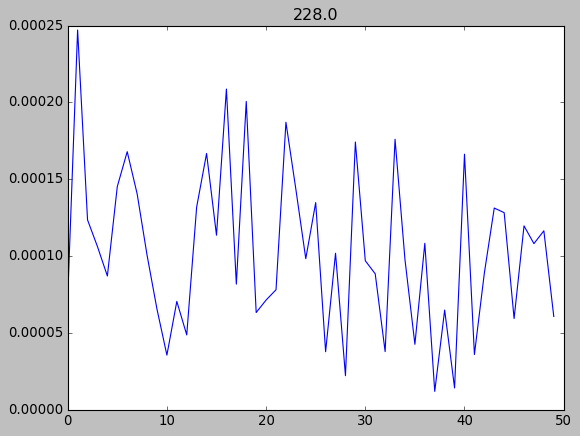

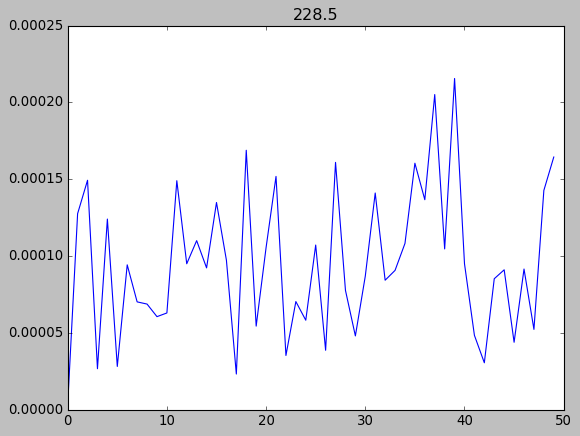

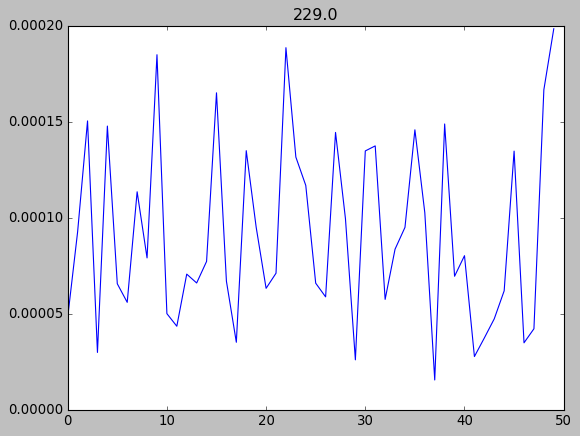

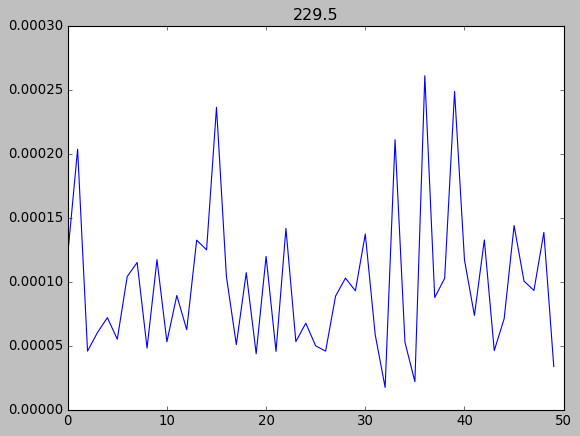

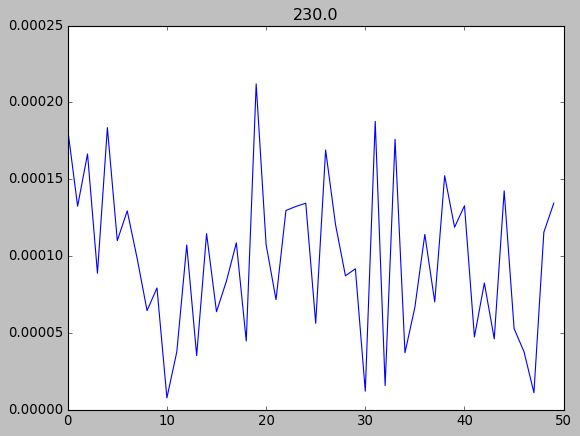

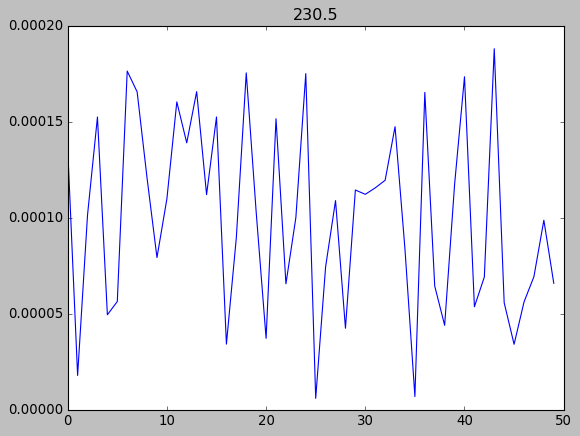

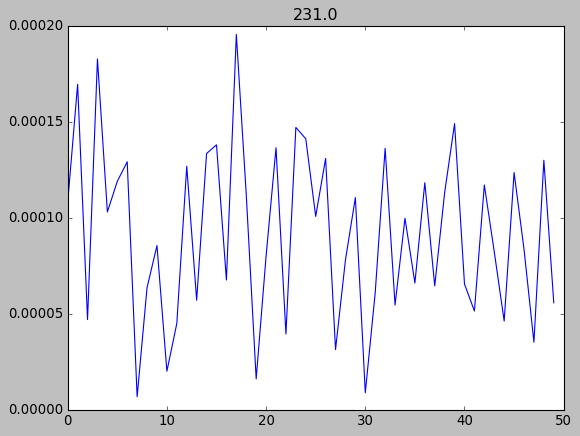

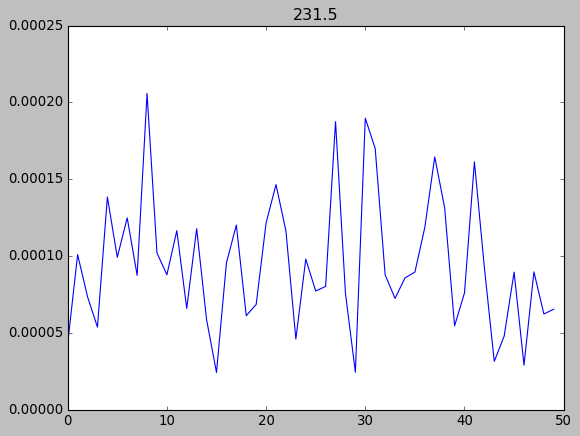

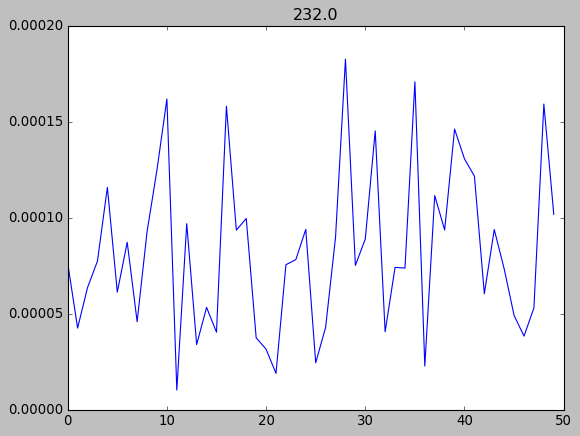

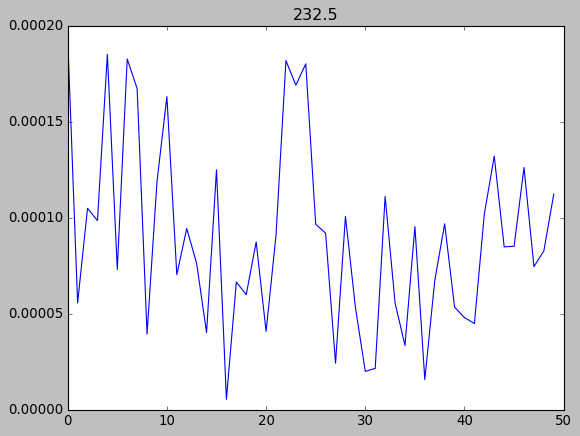

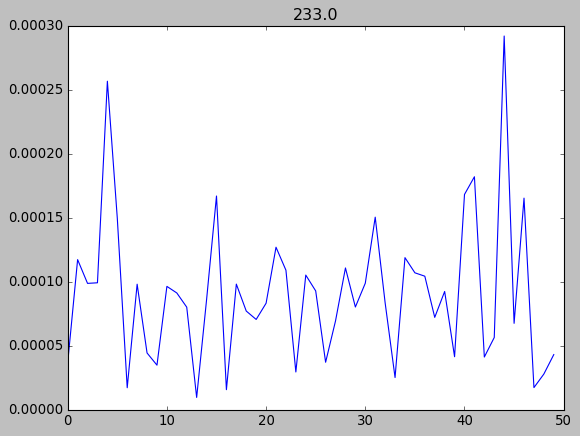

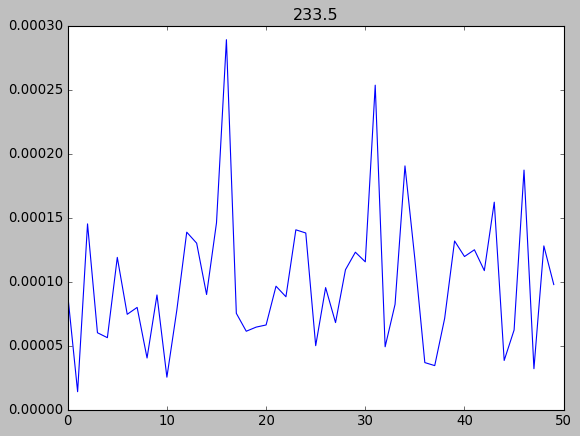

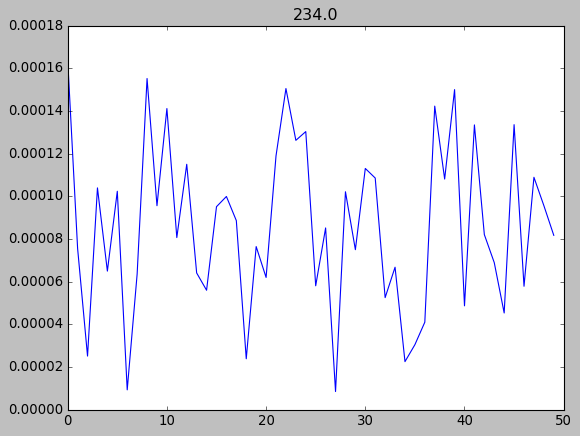

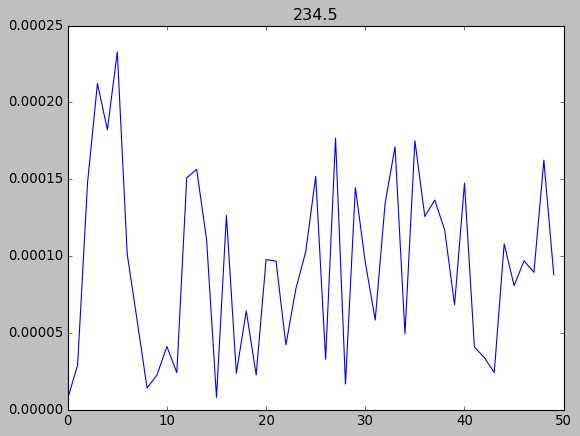

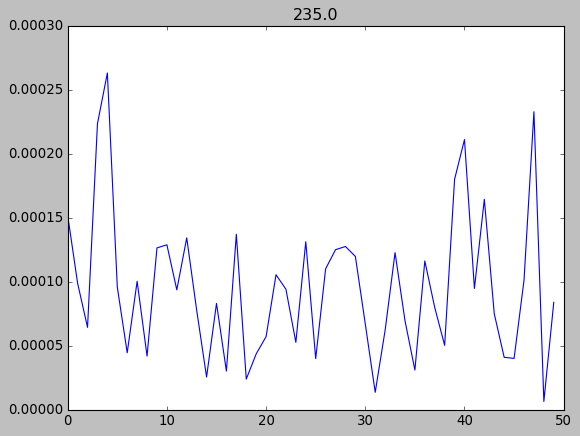

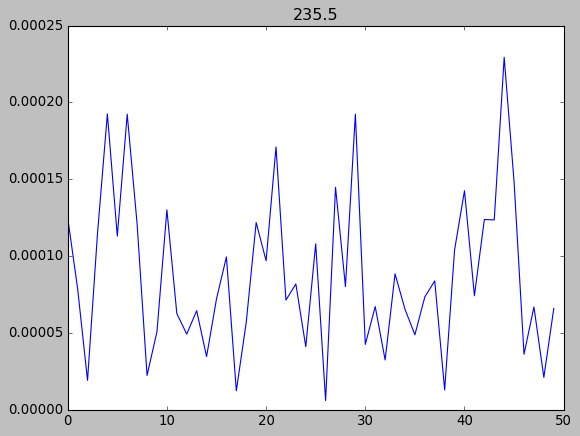

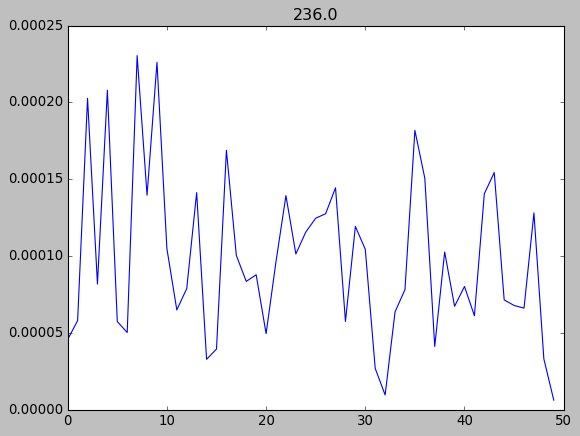

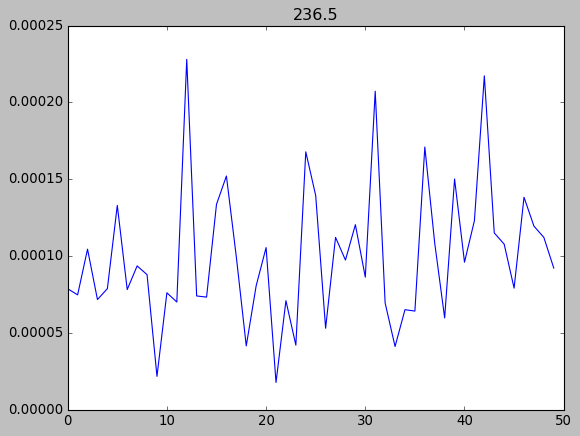

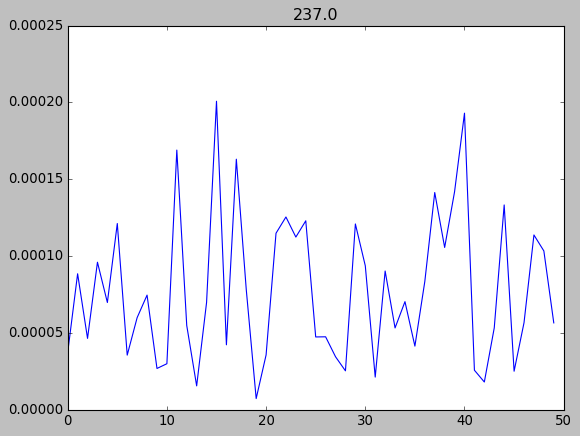

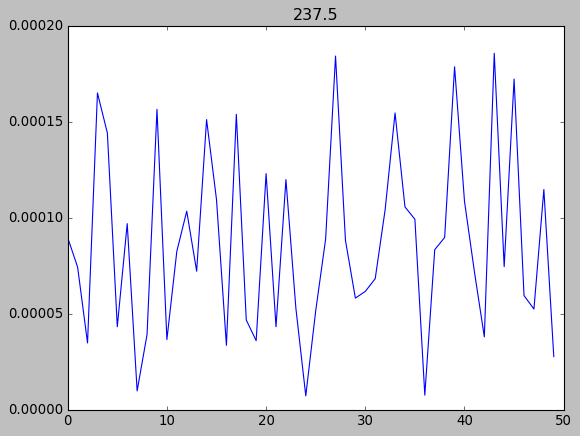

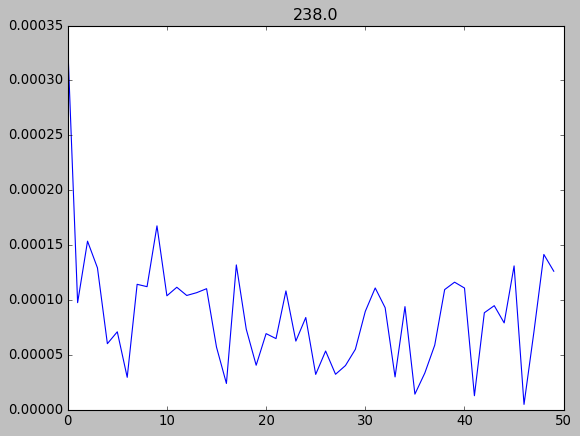

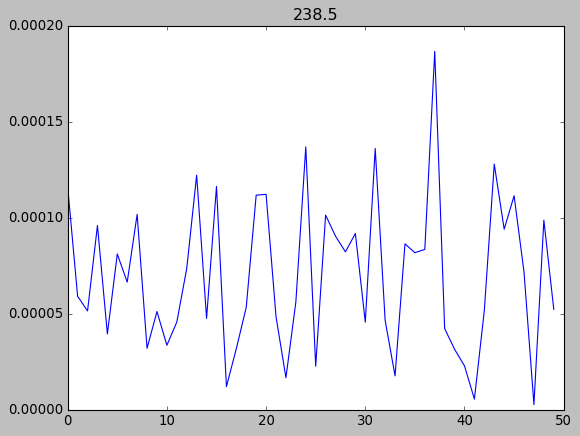

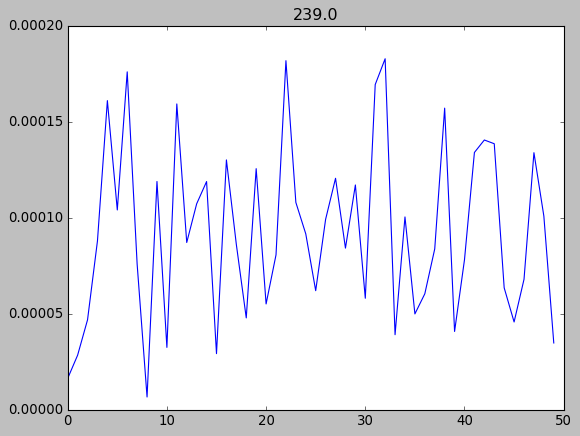

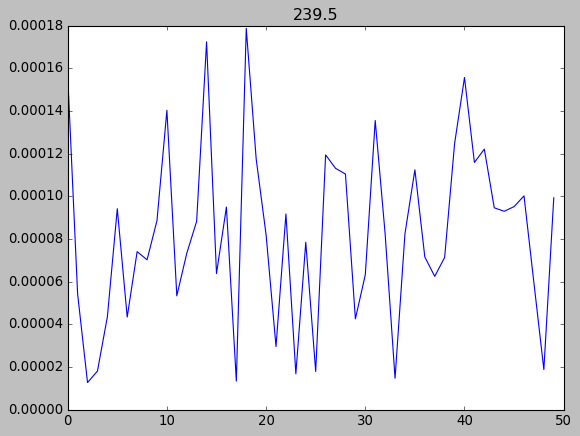

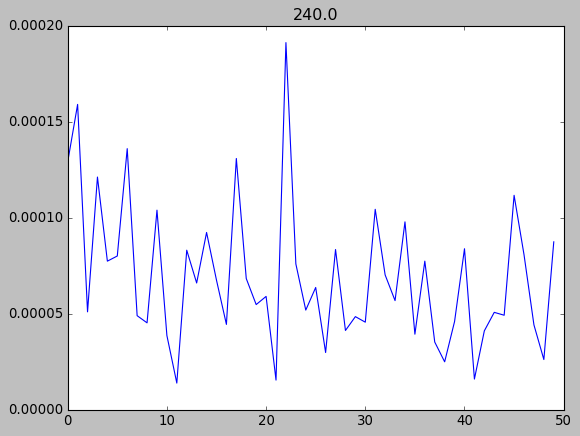

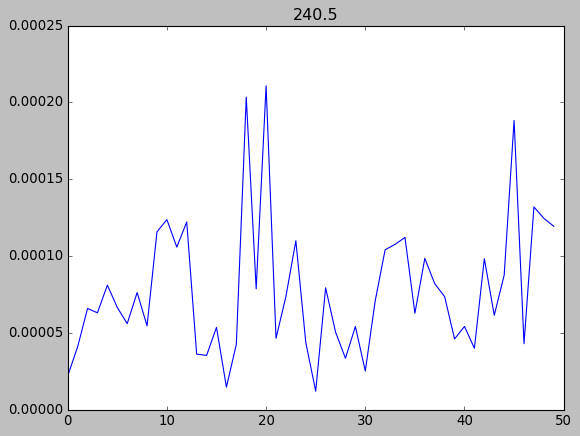

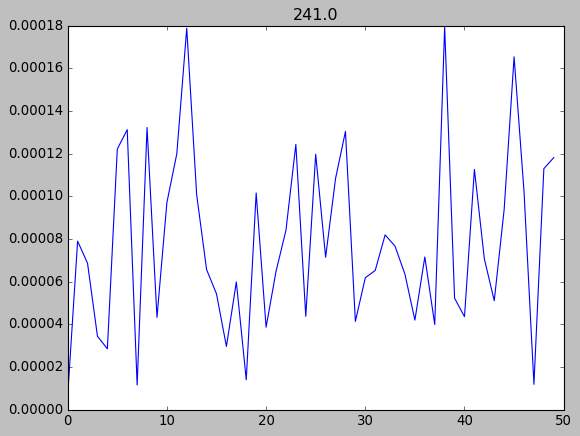

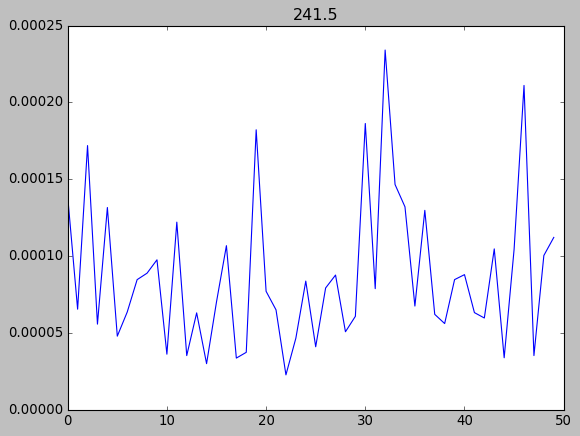

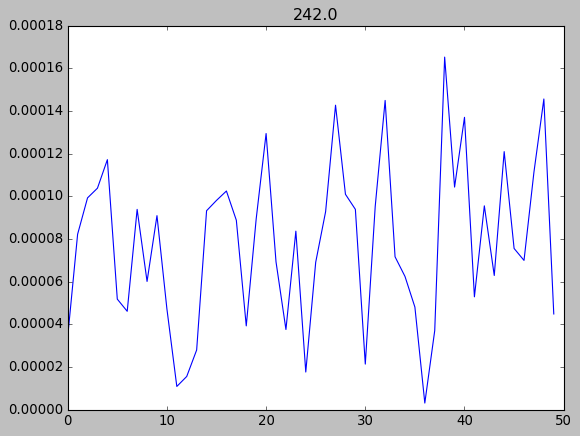

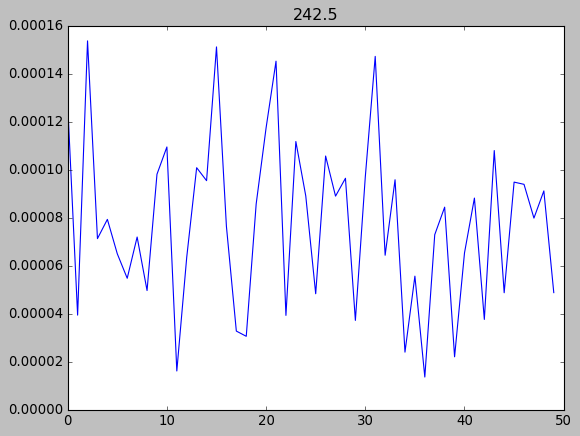

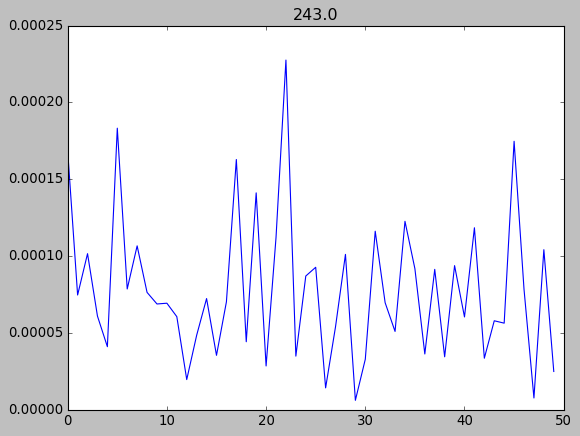

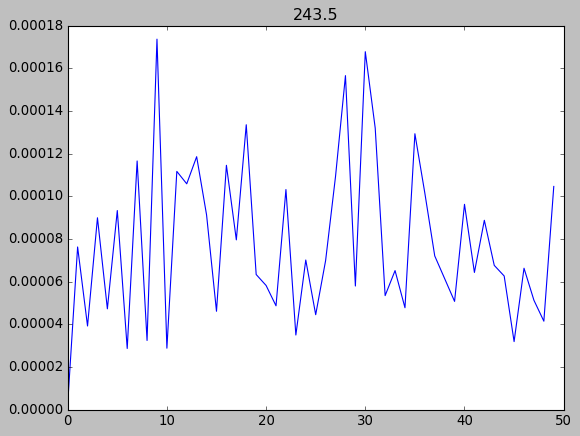

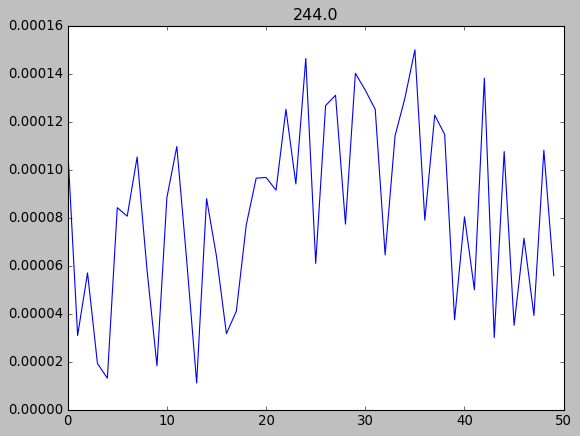

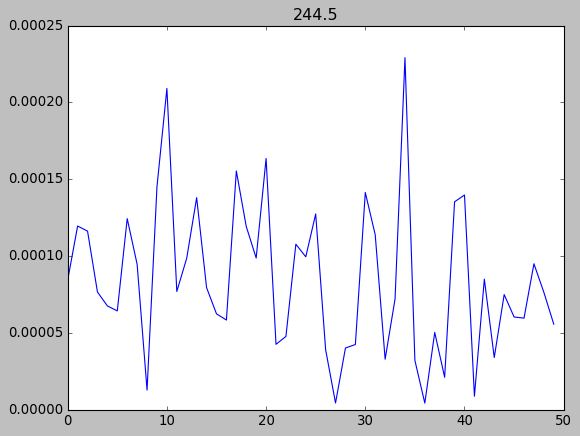

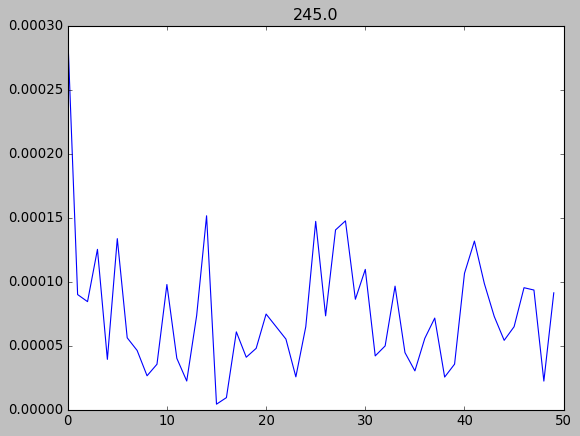

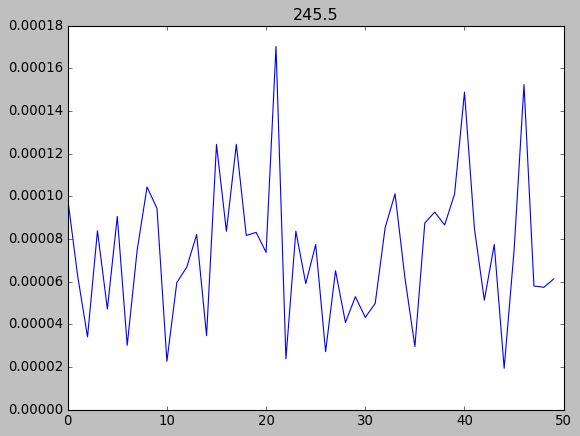

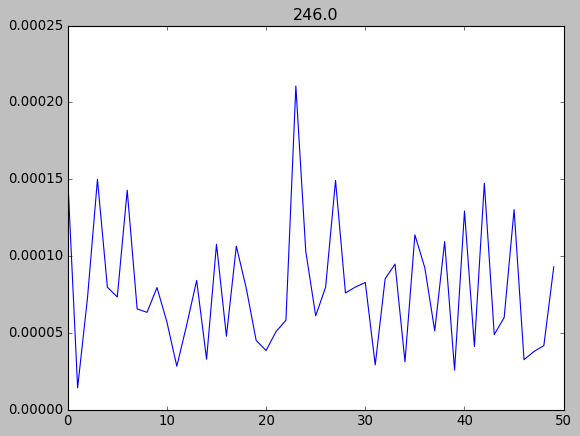

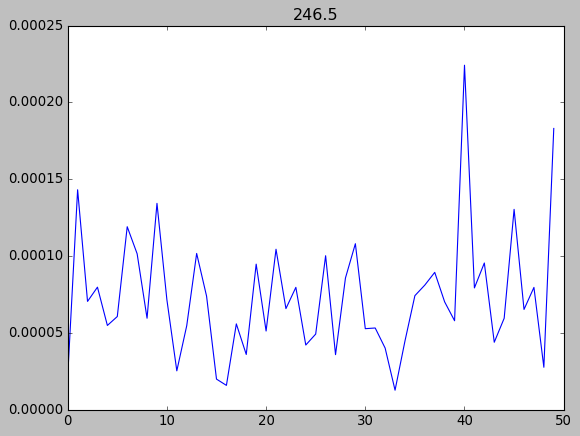

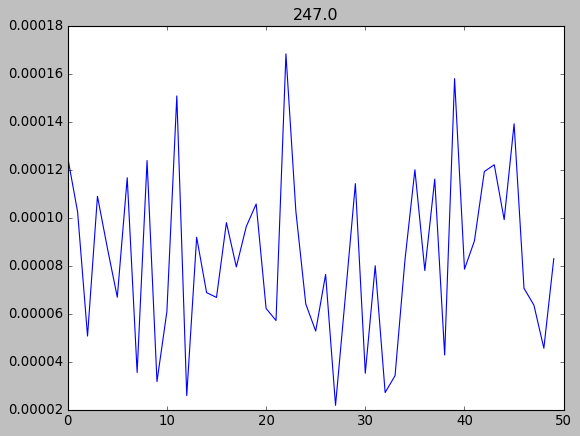

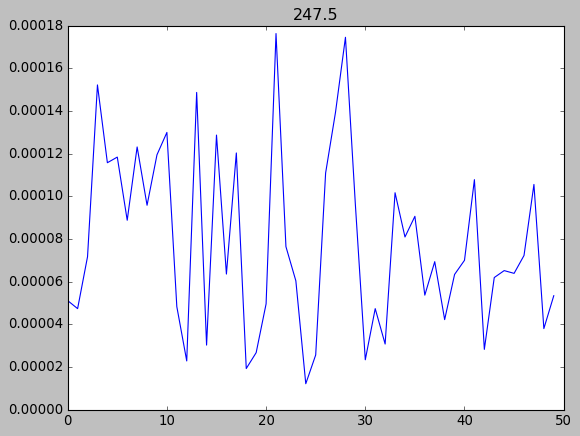

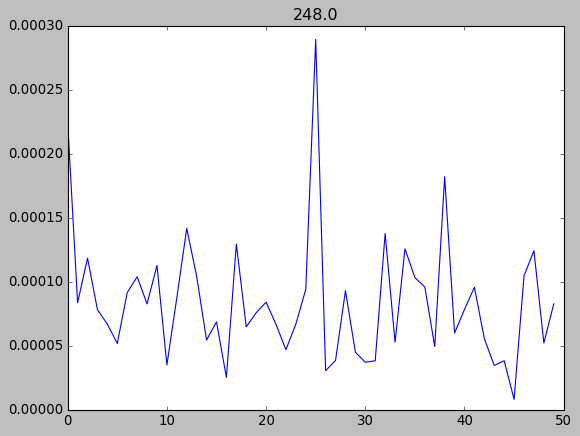

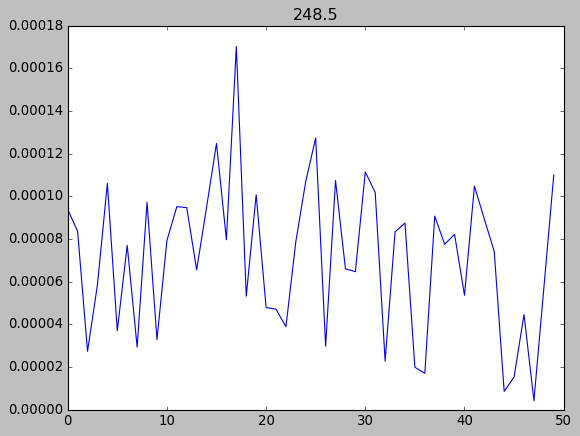

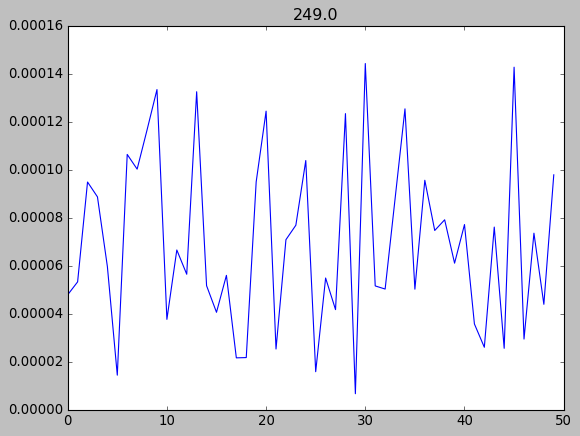

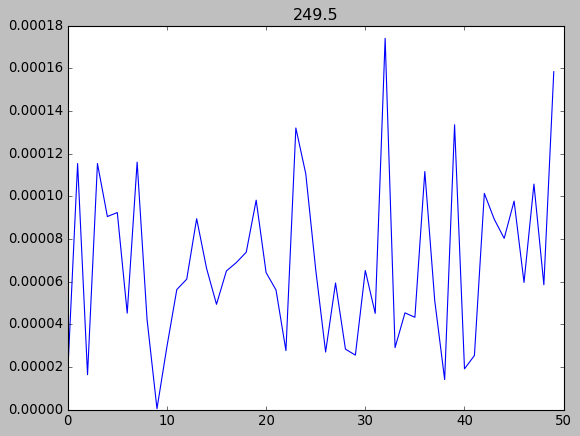

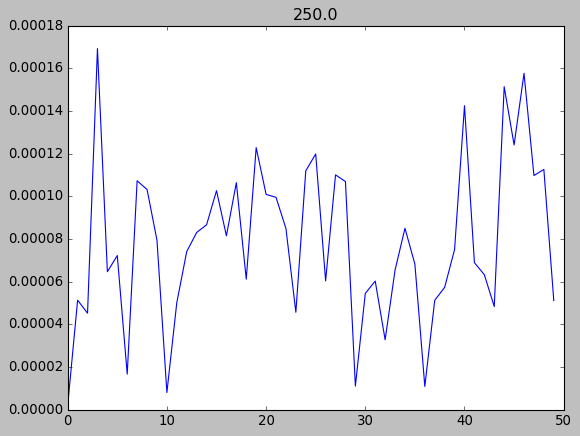

In [278]:
M = []
ll  = 50
for i in range(v_disp_210_230_total41_without_a_plie.shape[1]):
    plt.title(str(i*0.5+210))
    f1 = np.fft.rfft(v_disp_210_230_total41_with_a_plie[:,i])
    f0 = np.fft.rfft(v_disp_210_230_total41_without_a_plie[:,i])
    length = len(f1)
    AA = abs((f1[0:ll])-(f0[0:ll]))
    plt.plot(AA)
    plt.show()
    M.append(AA.max())
    
# plt.figure(figsize=(20, 10))
# plt.plot(M)
# plt.vlines((Left_edge-210)/0.5, 0, np.abs(M)[int((Left_edge-210)/0.5)],colors = "r", linestyles = "dashed")
# plt.vlines((Right_edge-210)/0.5, 0,np.abs(M)[int((Right_edge-210)/0.5)],colors = "r", linestyles = "dashed")
# x = np.linspace(0, N_group, num=N_group+1)
# label = []
# for i in range(0,N_group):
#     label.append(str(i*0.5+210))
# plt.xticks(x,label,rotation='vertical')
# plt.show()


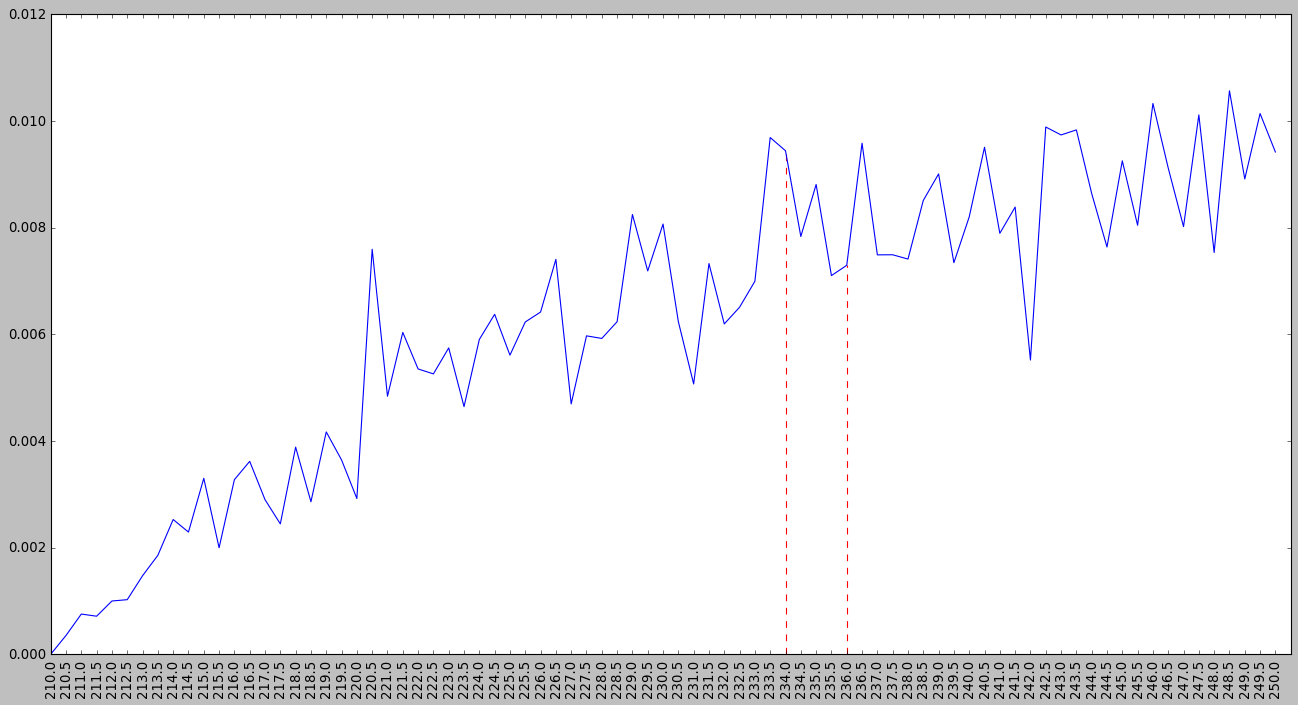

In [267]:
diff = []
for i in range(v_disp_210_230_total41_without_a_plie.shape[1]):
    f = np.fft.fft(v_disp_210_230_total41_with_a_plie[:,i])
    f1 = np.fft.fft(v_disp_210_230_total41_without_a_plie[:,i])
    length = len(f)
#     plt.plot(f1[length - 30:length],label = "N")
#     plt.plot(f[length - 30:length],label = 'Y')
    AA = i*abs(f1[length - 15:length]-f[length - 15:length])
    diff.append(AA.max())
    
    
plt.figure(figsize=(20, 10))
plt.plot(np.abs(diff))
plt.vlines((Left_edge-210)/0.5, 0, np.abs(diff)[int((Left_edge-210)/0.5)],colors = "r", linestyles = "dashed")
plt.vlines((Right_edge-210)/0.5, 0,np.abs(diff)[int((Right_edge-210)/0.5)],colors = "r", linestyles = "dashed")
x = np.linspace(0, N_group, num=N_group+1)
label = []
for i in range(0,N_group):
    label.append(str(i*0.5+210))
plt.xticks(x,label,rotation='vertical')
plt.show()

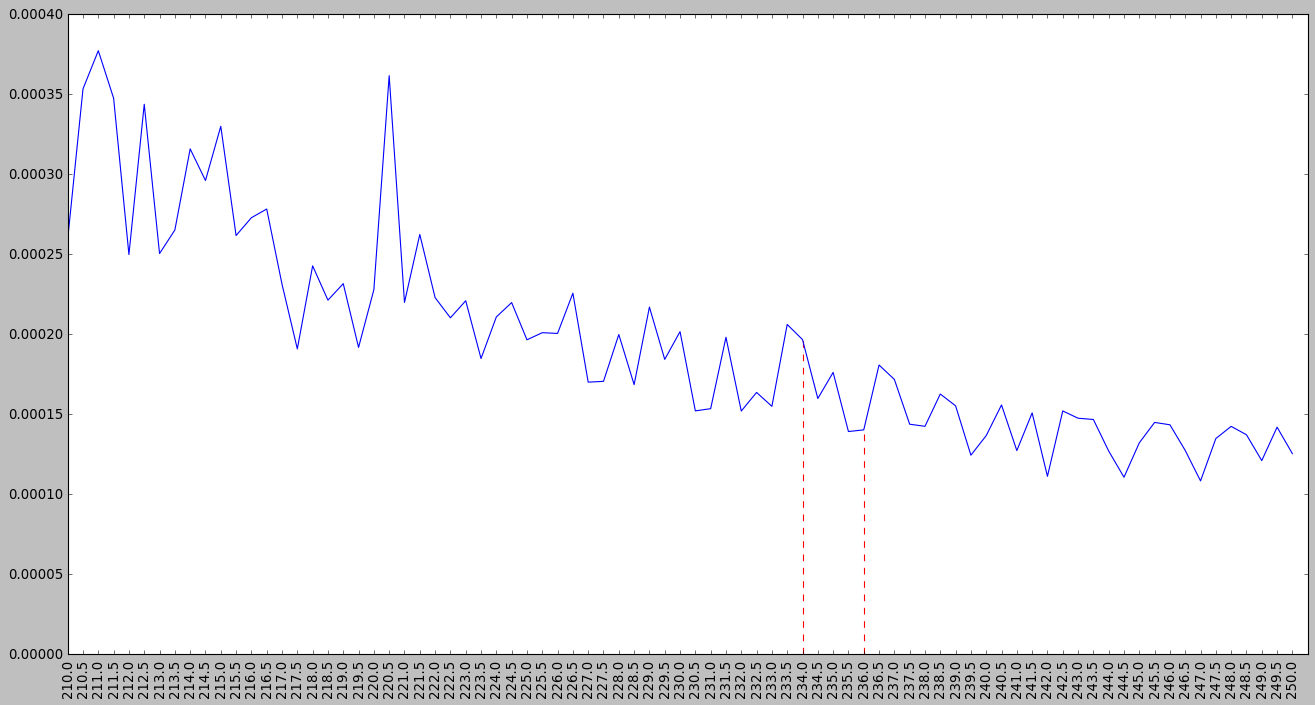

In [268]:
diff = []
for i in range(v_disp_210_230_total41_without_a_plie.shape[1]):
    f = np.fft.fft(v_disp_210_230_total41_with_a_plie[:,i])
    f1 = np.fft.fft(v_disp_210_230_total41_without_a_plie[:,i])
    length = len(f)
#     plt.plot(f1[length - 30:length],label = "N")
#     plt.plot(f[length - 30:length],label = 'Y')
    AA = abs(f1[length - 30:length]-f[length - 30:length])
    diff.append(AA.max())
    
    
plt.figure(figsize=(20, 10))
plt.plot(np.abs(diff))
plt.vlines((Left_edge-210)/0.5, 0, np.abs(diff)[int((Left_edge-210)/0.5)],colors = "r", linestyles = "dashed")
plt.vlines((Right_edge-210)/0.5, 0,np.abs(diff)[int((Right_edge-210)/0.5)],colors = "r", linestyles = "dashed")
x = np.linspace(0, N_group, num=N_group+1)
label = []
for i in range(0,N_group):
    label.append(str(i*0.5+210))
plt.xticks(x,label,rotation='vertical')
plt.show()

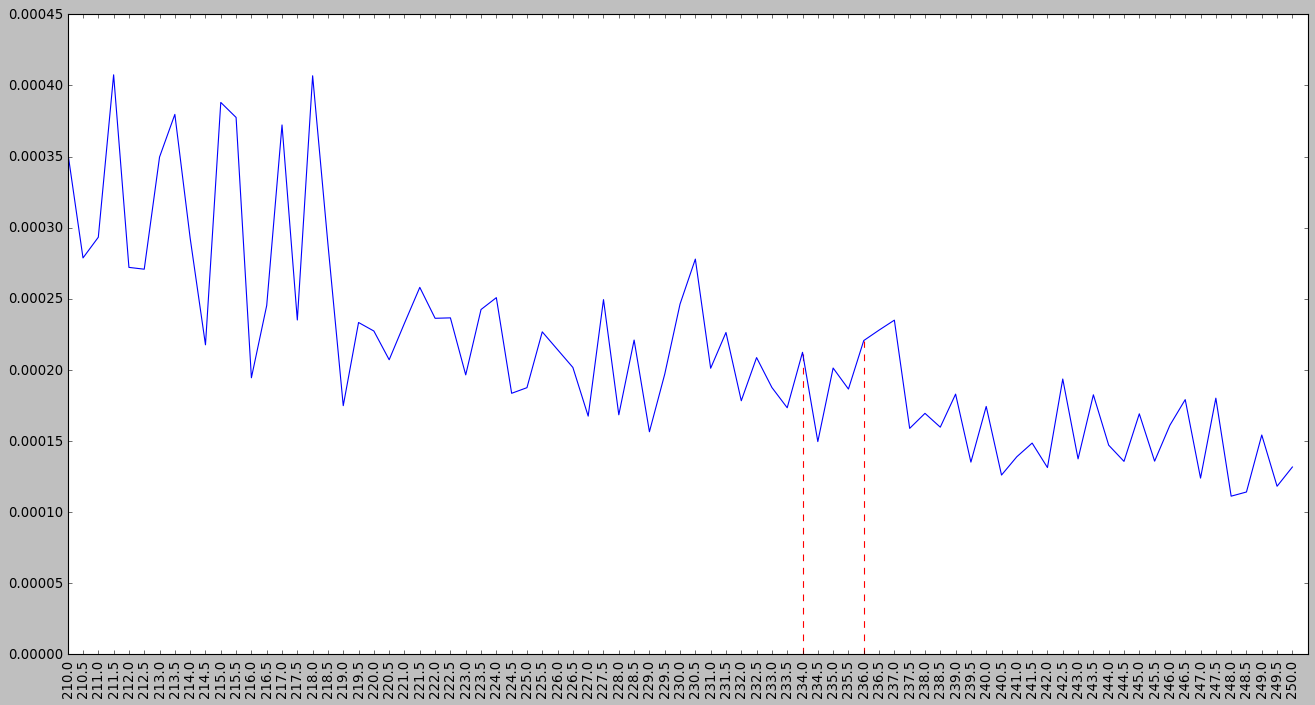

In [255]:
diff = []
for i in range(v_disp_210_230_total41_without_a_plie.shape[1]):
    f = np.fft.fft(v_disp_210_230_total41_with_a_plie[:,i])
    f1 = np.fft.fft(v_disp_210_230_total41_without_a_plie[:,i])
    length = len(f)
#     plt.plot(f1[length - 30:length],label = "N")
#     plt.plot(f[length - 30:length],label = 'Y')
    AA = abs(f1-f)
    diff.append(AA.max())
    
    
plt.figure(figsize=(20, 10))
plt.plot(np.abs(diff))
plt.vlines((Left_edge-210)/0.5, 0, np.abs(diff)[int((Left_edge-210)/0.5)],colors = "r", linestyles = "dashed")
plt.vlines((Right_edge-210)/0.5, 0,np.abs(diff)[int((Right_edge-210)/0.5)],colors = "r", linestyles = "dashed")
x = np.linspace(0, N_group, num=N_group+1)
label = []
for i in range(0,N_group):
    label.append(str(i*0.5+210))
plt.xticks(x,label,rotation='vertical')
plt.show()

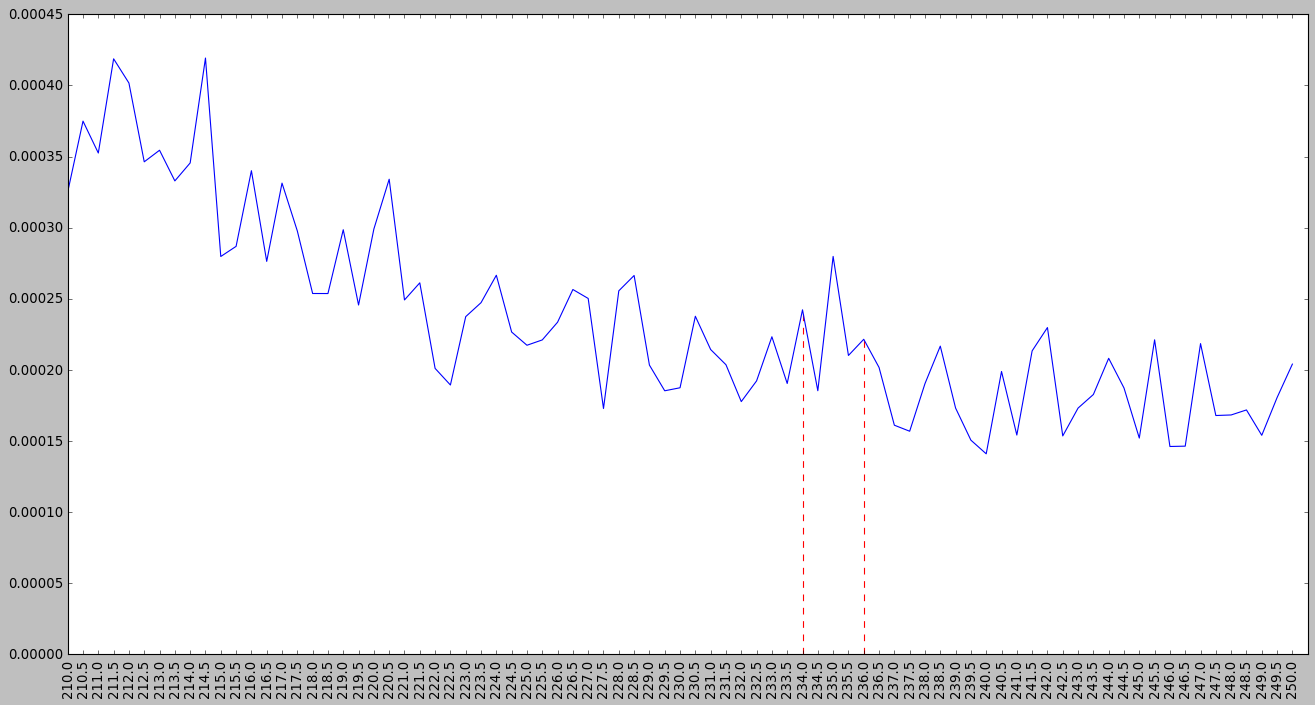

In [199]:
diff = []
for i in range(v_disp_210_230_total41_without_a_plie.shape[1]):
    f = np.fft.fft(v_disp_210_230_total41_with_a_plie[:,i]-v_disp_210_230_total41_without_a_plie[:,i])
    length = len(f)
#     plt.plot(f1[length - 30:length],label = "N")
#     plt.plot(f[length - 30:length],label = 'Y')
    AA = abs(f)
    diff.append(AA.max())
    
    
plt.figure(figsize=(20, 10))
plt.plot(np.abs(diff))
plt.vlines((Left_edge-210)/0.5, 0, np.abs(diff)[int((Left_edge-210)/0.5)],colors = "r", linestyles = "dashed")
plt.vlines((Right_edge-210)/0.5, 0,np.abs(diff)[int((Right_edge-210)/0.5)],colors = "r", linestyles = "dashed")
x = np.linspace(0, N_group, num=N_group+1)
label = []
for i in range(0,N_group):
    label.append(str(i*0.5+210))
plt.xticks(x,label,rotation='vertical')
plt.show()

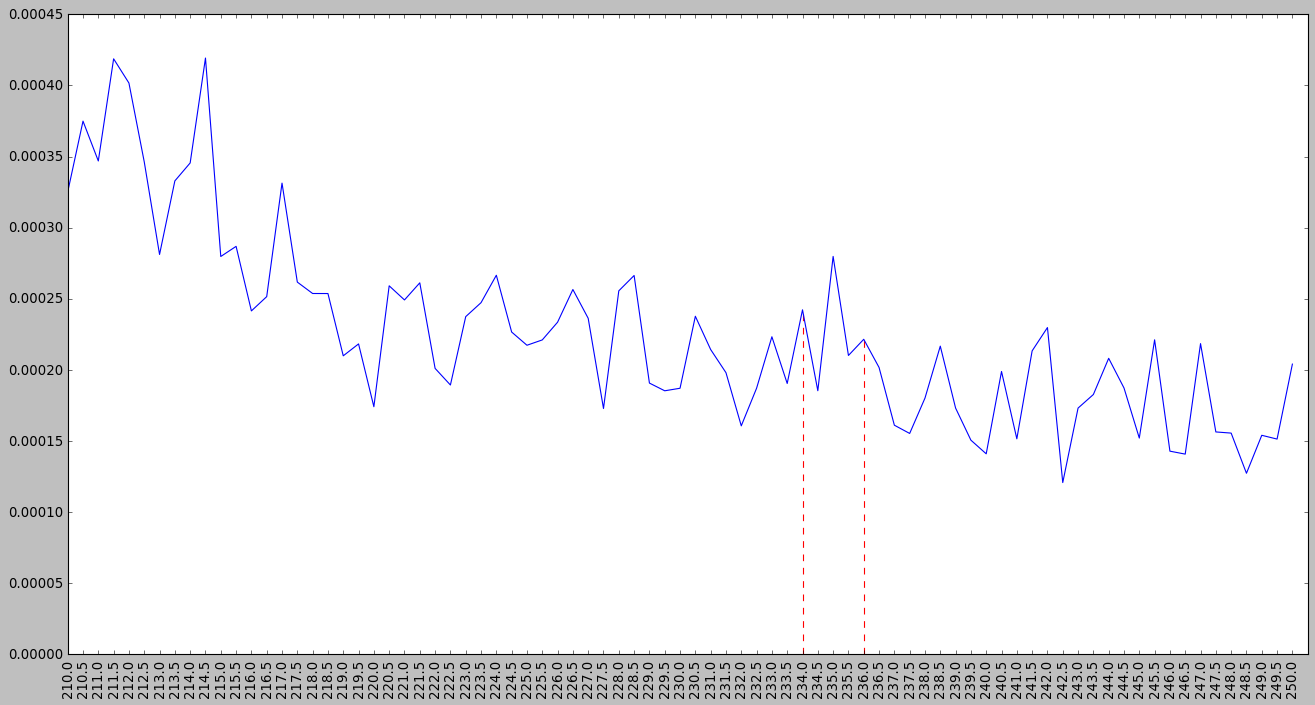

In [200]:
diff = []
for i in range(v_disp_210_230_total41_without_a_plie.shape[1]):
    f = np.fft.fft(v_disp_210_230_total41_with_a_plie[:,i])
    f1 = np.fft.fft(v_disp_210_230_total41_without_a_plie[:,i])
    length = len(f)
#     plt.plot(f1[length - 30:length],label = "N")
#     plt.plot(f[length - 30:length],label = 'Y')
    AA = abs(f1[0:30]-f[0:30])
    diff.append(AA.max())
    
    
plt.figure(figsize=(20, 10))
plt.plot(np.abs(diff))
plt.vlines((Left_edge-210)/0.5, 0, np.abs(diff)[int((Left_edge-210)/0.5)],colors = "r", linestyles = "dashed")
plt.vlines((Right_edge-210)/0.5, 0,np.abs(diff)[int((Right_edge-210)/0.5)],colors = "r", linestyles = "dashed")
x = np.linspace(0, N_group, num=N_group+1)
label = []
for i in range(0,N_group):
    label.append(str(i*0.5+210))
plt.xticks(x,label,rotation='vertical')
plt.show()

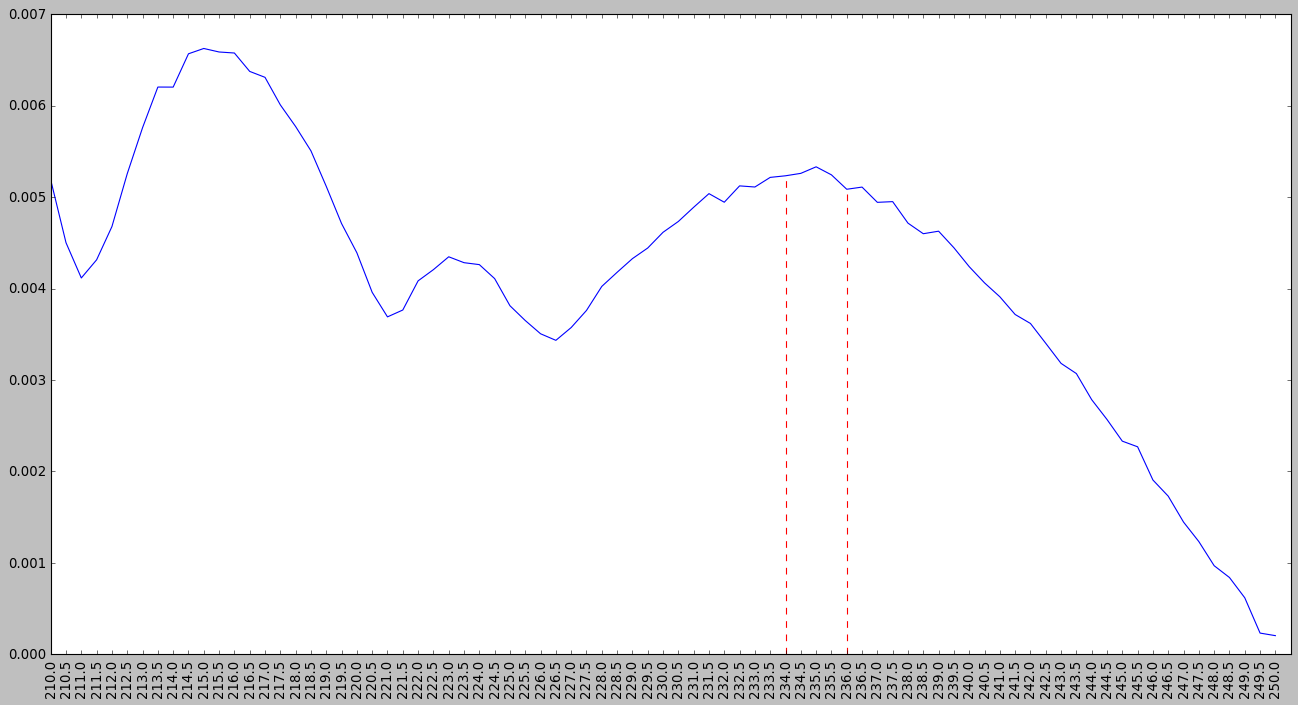

In [201]:
diff = []
for i in range(v_disp_210_230_total41_without_a_plie.shape[1]):
    f = np.fft.fft(v_disp_210_230_total41_with_a_plie[:,i])
    length = len(f)
#     plt.plot(f1[length - 30:length],label = "N")
#     plt.plot(f[length - 30:length],label = 'Y')
    AA = abs(f1[0:30]-f[0:30])
    diff.append(AA.max())
    
    
plt.figure(figsize=(20, 10))
plt.plot(np.abs(diff))
plt.vlines((Left_edge-210)/0.5, 0, np.abs(diff)[int((Left_edge-210)/0.5)],colors = "r", linestyles = "dashed")
plt.vlines((Right_edge-210)/0.5, 0,np.abs(diff)[int((Right_edge-210)/0.5)],colors = "r", linestyles = "dashed")
x = np.linspace(0, N_group, num=N_group+1)
label = []
for i in range(0,N_group):
    label.append(str(i*0.5+210))
plt.xticks(x,label,rotation='vertical')
plt.show()